In [180]:
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import numpy as np
warnings.filterwarnings("ignore")
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn import neighbors
from sklearn import svm
from sklearn import tree
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from keras.utils.np_utils import to_categorical
from keras.callbacks import Callback
from keras.callbacks import EarlyStopping

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn import datasets
from sklearn import neighbors
from sklearn import svm
from sklearn import tree
from sklearn import ensemble
# import some validation tools
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import confusion_matrix

from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from pandas.plotting import scatter_matrix
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer, MinMaxScaler, StandardScaler, RobustScaler
import seaborn as sns

from catboost import CatBoostClassifier

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import roc_curve, auc

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import learning_curve, GridSearchCV

from xgboost import XGBClassifier

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from keras.utils.np_utils import to_categorical
from keras.callbacks import Callback
from keras.callbacks import EarlyStopping

from sklearn.decomposition import PCA

from sklearn.model_selection import StratifiedKFold

In [181]:
data = pd.read_csv("dataframe.csv")


In [182]:
data.head()

,Unnamed: 0,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,education_age,age_hours
0,0,25,Private,226802,HS-dropout,7,Never-married,Machine-op-inspct,Own-child,Non-White,Male,0,0,40,United-States,0,175,1000
1,1,38,Private,89814,HS-grad,9,Married,Farming-fishing,Husband,White,Male,0,0,50,United-States,0,342,1900
2,2,28,Public,336951,Associate,12,Married,Protective-serv,Husband,White,Male,0,0,40,United-States,1,336,1120
3,3,44,Private,160323,Associate,10,Married,Machine-op-inspct,Husband,Non-White,Male,7688,0,40,United-States,1,440,1760
4,5,34,Private,198693,HS-dropout,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0,204,1020


In [183]:
data = data.drop("Unnamed: 0", axis=1)

In [179]:
data.head()

,income,workclass_Private,workclass_Public,workclass_Self-Employed,workclass_Unemployed,education_Associate,education_Bachelors,education_Doctorate,education_HS-dropout,education_HS-grad,...,relationship_Wife,gender_Female,gender_Male,capital-gain,capital-loss,hours-per-week,age,educational-num,education_age,age_hours
0,0,1,0,0,0,0,0,0,1,0,...,0,0,1,-0.146911,-0.219046,-0.079299,-1.027499,-1.221185,-1.255971,-0.812969
1,0,1,0,0,0,0,0,0,0,1,...,0,0,1,-0.146911,-0.219046,0.753238,-0.042774,-0.440824,-0.289013,0.415770
2,1,0,1,0,0,1,0,0,0,0,...,0,0,1,-0.146911,-0.219046,-0.079299,-0.800255,0.729719,-0.323754,-0.649137
3,1,1,0,0,0,1,0,0,0,0,...,0,0,1,0.865509,-0.219046,-0.079299,0.411714,-0.050643,0.278424,0.224633
4,0,1,0,0,0,0,0,0,1,0,...,0,0,1,-0.146911,-0.219046,-0.911836,-0.345767,-1.611366,-1.088056,-0.785664


In [184]:
data = data.drop("fnlwgt", axis=1)

In [185]:
data.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,education_age,age_hours
0,25,Private,HS-dropout,7,Never-married,Machine-op-inspct,Own-child,Non-White,Male,0,0,40,United-States,0,175,1000
1,38,Private,HS-grad,9,Married,Farming-fishing,Husband,White,Male,0,0,50,United-States,0,342,1900
2,28,Public,Associate,12,Married,Protective-serv,Husband,White,Male,0,0,40,United-States,1,336,1120
3,44,Private,Associate,10,Married,Machine-op-inspct,Husband,Non-White,Male,7688,0,40,United-States,1,440,1760
4,34,Private,HS-dropout,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0,204,1020


In [186]:
data = data.drop(["native-country", "race"], axis=1)
data.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,gender,capital-gain,capital-loss,hours-per-week,income,education_age,age_hours
0,25,Private,HS-dropout,7,Never-married,Machine-op-inspct,Own-child,Male,0,0,40,0,175,1000
1,38,Private,HS-grad,9,Married,Farming-fishing,Husband,Male,0,0,50,0,342,1900
2,28,Public,Associate,12,Married,Protective-serv,Husband,Male,0,0,40,1,336,1120
3,44,Private,Associate,10,Married,Machine-op-inspct,Husband,Male,7688,0,40,1,440,1760
4,34,Private,HS-dropout,6,Never-married,Other-service,Not-in-family,Male,0,0,30,0,204,1020


In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45981 entries, 0 to 45980
Data columns (total 14 columns):
age                45981 non-null int64
workclass          45981 non-null object
education          45981 non-null object
educational-num    45981 non-null int64
marital-status     45981 non-null object
occupation         45981 non-null object
relationship       45981 non-null object
gender             45981 non-null object
capital-gain       45981 non-null int64
capital-loss       45981 non-null int64
hours-per-week     45981 non-null int64
income             45981 non-null int64
education_age      45981 non-null int64
age_hours          45981 non-null int64
dtypes: int64(8), object(6)
memory usage: 4.9+ MB


In [188]:
data[data['hours-per-week']>100]

,age,workclass,education,educational-num,marital-status,occupation,relationship,gender,capital-gain,capital-loss,hours-per-week,income,education_age,age_hours


In [139]:
data = pd.get_dummies(data, prefix_sep='_')
data.head()

,age,educational-num,capital-gain,capital-loss,hours-per-week,income,education_age,age_hours,workclass_Private,workclass_Public,...,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,gender_Female,gender_Male
0,25,7,0,0,40,0,175,1000,1,0,...,0,0,0,0,0,1,0,0,0,1
1,38,9,0,0,50,0,342,1900,1,0,...,0,0,1,0,0,0,0,0,0,1
2,28,12,0,0,40,1,336,1120,0,1,...,0,0,1,0,0,0,0,0,0,1
3,44,10,7688,0,40,1,440,1760,1,0,...,0,0,1,0,0,0,0,0,0,1
4,34,6,0,0,30,0,204,1020,1,0,...,0,0,0,1,0,0,0,0,0,1


In [140]:
list(data.columns) 

['age',
 'educational-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'income',
 'education_age',
 'age_hours',
 'workclass_Private',
 'workclass_Public',
 'workclass_Self-Employed',
 'workclass_Unemployed',
 'education_Associate',
 'education_Bachelors',
 'education_Doctorate',
 'education_HS-dropout',
 'education_HS-grad',
 'education_Masters',
 'education_Prof-school',
 'marital-status_Married',
 'marital-status_Never-married',
 'marital-status_Separated',
 'marital-status_Widowed',
 'occupation_Adm-clerical',
 'occupation_Armed-Forces',
 'occupation_Craft-repair',
 'occupation_Exec-managerial',
 'occupation_Farming-fishing',
 'occupation_Handlers-cleaners',
 'occupation_Machine-op-inspct',
 'occupation_Other-service',
 'occupation_Priv-house-serv',
 'occupation_Prof-specialty',
 'occupation_Protective-serv',
 'occupation_Sales',
 'occupation_Tech-support',
 'occupation_Transport-moving',
 'relationship_Husband',
 'relationship_Not-in-family',
 'relationship_Other-relati

I had planned Stratified sampling before but Over-sampling performed now..

https://towardsdatascience.com/what-to-do-when-your-classification-dataset-is-imbalanced-6af031b12a36

In [141]:
X = data.drop('income',axis=1)
y = data['income']



In [142]:
data.head()

,age,educational-num,capital-gain,capital-loss,hours-per-week,income,education_age,age_hours,workclass_Private,workclass_Public,...,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,gender_Female,gender_Male
0,25,7,0,0,40,0,175,1000,1,0,...,0,0,0,0,0,1,0,0,0,1
1,38,9,0,0,50,0,342,1900,1,0,...,0,0,1,0,0,0,0,0,0,1
2,28,12,0,0,40,1,336,1120,0,1,...,0,0,1,0,0,0,0,0,0,1
3,44,10,7688,0,40,1,440,1760,1,0,...,0,0,1,0,0,0,0,0,0,1
4,34,6,0,0,30,0,204,1020,1,0,...,0,0,0,1,0,0,0,0,0,1


In [143]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

cols_to_scale_standard = ['capital-gain','capital-loss','hours-per-week', 'age', 'educational-num', 'education_age', 'age_hours']
#cols_to_scale_robust = ['capital-gain']


standardSc = StandardScaler()
standardSc.fit(data[cols_to_scale_standard])

robustSc = RobustScaler()
#robustSc.fit(data[cols_to_scale_robust])

In [144]:
def scale_columns_legit(df, column_names, scaler):
    
    d = data.copy()
    
    for column_name in column_names:
        if (not column_name in d.columns):
            return
  
    scaled_array = scaler.transform(d[column_names])
    scaled_df = pd.DataFrame(scaled_array, columns=column_names)
    scaled_df.index = d.index
    d.drop(columns=column_names, inplace=True)
      
    return pd.concat([d, scaled_df], axis=1)


In [145]:
data = scale_columns_legit(data, cols_to_scale_standard, standardSc)
#data = scale_columns_legit(data, cols_to_scale_robust, robustSc)


In [146]:
data.head()

,income,workclass_Private,workclass_Public,workclass_Self-Employed,workclass_Unemployed,education_Associate,education_Bachelors,education_Doctorate,education_HS-dropout,education_HS-grad,...,relationship_Wife,gender_Female,gender_Male,capital-gain,capital-loss,hours-per-week,age,educational-num,education_age,age_hours
0,0,1,0,0,0,0,0,0,1,0,...,0,0,1,-0.146911,-0.219046,-0.079299,-1.027499,-1.221185,-1.255971,-0.812969
1,0,1,0,0,0,0,0,0,0,1,...,0,0,1,-0.146911,-0.219046,0.753238,-0.042774,-0.440824,-0.289013,0.415770
2,1,0,1,0,0,1,0,0,0,0,...,0,0,1,-0.146911,-0.219046,-0.079299,-0.800255,0.729719,-0.323754,-0.649137
3,1,1,0,0,0,1,0,0,0,0,...,0,0,1,0.865509,-0.219046,-0.079299,0.411714,-0.050643,0.278424,0.224633
4,0,1,0,0,0,0,0,0,1,0,...,0,0,1,-0.146911,-0.219046,-0.911836,-0.345767,-1.611366,-1.088056,-0.785664


In [147]:
X = data.drop('income',axis=1)
y = data['income']

In [148]:

X.head()

,workclass_Private,workclass_Public,workclass_Self-Employed,workclass_Unemployed,education_Associate,education_Bachelors,education_Doctorate,education_HS-dropout,education_HS-grad,education_Masters,...,relationship_Wife,gender_Female,gender_Male,capital-gain,capital-loss,hours-per-week,age,educational-num,education_age,age_hours
0,1,0,0,0,0,0,0,1,0,0,...,0,0,1,-0.146911,-0.219046,-0.079299,-1.027499,-1.221185,-1.255971,-0.812969
1,1,0,0,0,0,0,0,0,1,0,...,0,0,1,-0.146911,-0.219046,0.753238,-0.042774,-0.440824,-0.289013,0.415770
2,0,1,0,0,1,0,0,0,0,0,...,0,0,1,-0.146911,-0.219046,-0.079299,-0.800255,0.729719,-0.323754,-0.649137
3,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0.865509,-0.219046,-0.079299,0.411714,-0.050643,0.278424,0.224633
4,1,0,0,0,0,0,0,1,0,0,...,0,0,1,-0.146911,-0.219046,-0.911836,-0.345767,-1.611366,-1.088056,-0.785664


In [215]:
pca = PCA(n_components = 0.95)

eigenbasis = pca.fit(X)

data20d = eigenbasis.transform(X)

In [216]:
data20d.shape

(45981, 21)

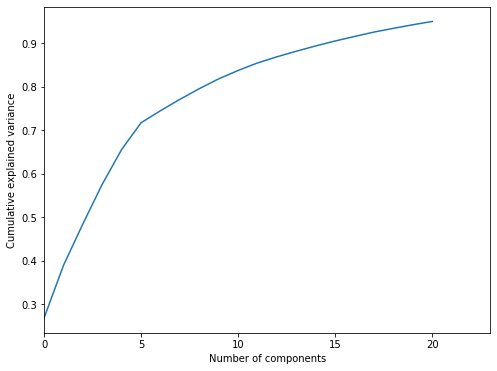

In [221]:
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,23,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [222]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
dim = np.argmax(cumsum >= 0.95) + 1
print('The number of dimensions required to preserve 95% of variance is',dim)


The number of dimensions required to preserve 95% of variance is 21


In [223]:
data20d.shape

(45981, 21)

In [224]:
X_train


array([[-0.19400173, -0.42510351,  0.10521987, ..., -0.42160567,
        -0.48100984, -0.23227988],
       [ 4.59247126,  2.44129925,  1.36237345, ...,  0.31492656,
        -0.07532834, -0.17573668],
       [ 0.18356355, -0.45203768,  2.02686201, ...,  0.22867141,
         0.43897413,  0.15371362],
       ...,
       [-0.21855281, -0.94177769,  0.78699258, ..., -0.39915632,
         0.06495969,  0.06648048],
       [ 2.63461459, -2.08258991, -0.34427495, ...,  0.33201064,
        -0.40726461,  0.13835019],
       [ 3.34283465, -1.32823282, -0.99227661, ...,  0.00572534,
        -0.41792435, -0.04446782]])

# start from here

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

sm = SMOTE(random_state=27, ratio=0.5)

X_train, y_train = sm.fit_sample(X_train, y_train)

X_train.shape, y_train.shape


((41454, 44), (41454,))

In [ ]:
from sklearn import manifold

TSNE = manifold.TSNE(n_components = 2, perplexity = 50).fit_transform(X)

colors = ['blue', 'red']
#           0        1         2       3       4       5       6       7        8         9
for i in range(len(X)):
    
    point = TSNE[i]
    classLabel = y[i]

    plt.scatter(point[0], point[1], color=colors[classLabel])

In [151]:
scoring = 'accuracy'
models = []

models.append(('KNN', KNeighborsClassifier()))
models.append(('Logistic R', LogisticRegression()))
models.append(('Decision T', DecisionTreeClassifier()))
#models.append(('NB', GaussianNB()))
models.append(('Gradient B', GradientBoostingClassifier()))
models.append(('Random F', RandomForestClassifier(n_jobs=-1)))
models.append(('Cat B', CatBoostClassifier(learning_rate=0.05)))
models.append(('SVM', SVC()))

# evaluate each model in turn

results = []
names = []
for name, model in models:
    
    kfold = StratifiedKFold( n_splits=3 )
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    

KNN: 0.829103 (0.003569)
Logistic R: 0.846524 (0.002993)
Decision T: 0.815793 (0.002750)
Gradient B: 0.861617 (0.002881)
Random F: 0.838716 (0.001156)
0:	learn: 0.6417920	total: 22.4ms	remaining: 22.4s
1:	learn: 0.5955257	total: 62.5ms	remaining: 31.2s
2:	learn: 0.5580965	total: 78.9ms	remaining: 26.2s
3:	learn: 0.5268767	total: 89.3ms	remaining: 22.2s
4:	learn: 0.4974923	total: 98.1ms	remaining: 19.5s
5:	learn: 0.4777018	total: 105ms	remaining: 17.5s
6:	learn: 0.4589832	total: 112ms	remaining: 15.9s
7:	learn: 0.4413135	total: 118ms	remaining: 14.6s
8:	learn: 0.4294734	total: 124ms	remaining: 13.7s
9:	learn: 0.4173137	total: 130ms	remaining: 12.9s
10:	learn: 0.4059338	total: 137ms	remaining: 12.3s
11:	learn: 0.3963681	total: 143ms	remaining: 11.8s
12:	learn: 0.3886411	total: 149ms	remaining: 11.3s
13:	learn: 0.3810068	total: 155ms	remaining: 10.9s
14:	learn: 0.3750642	total: 162ms	remaining: 10.6s
15:	learn: 0.3696242	total: 168ms	remaining: 10.3s
16:	learn: 0.3641915	total: 174ms	rema

183:	learn: 0.2851049	total: 1.45s	remaining: 6.42s
184:	learn: 0.2850232	total: 1.46s	remaining: 6.42s
185:	learn: 0.2849143	total: 1.47s	remaining: 6.43s
186:	learn: 0.2846515	total: 1.48s	remaining: 6.42s
187:	learn: 0.2845705	total: 1.49s	remaining: 6.44s
188:	learn: 0.2844956	total: 1.5s	remaining: 6.45s
189:	learn: 0.2844254	total: 1.51s	remaining: 6.43s
190:	learn: 0.2842822	total: 1.52s	remaining: 6.46s
191:	learn: 0.2841990	total: 1.54s	remaining: 6.47s
192:	learn: 0.2840808	total: 1.54s	remaining: 6.46s
193:	learn: 0.2839684	total: 1.56s	remaining: 6.47s
194:	learn: 0.2836215	total: 1.57s	remaining: 6.47s
195:	learn: 0.2835616	total: 1.57s	remaining: 6.46s
196:	learn: 0.2834244	total: 1.59s	remaining: 6.48s
197:	learn: 0.2833323	total: 1.61s	remaining: 6.52s
198:	learn: 0.2832146	total: 1.63s	remaining: 6.55s
199:	learn: 0.2831589	total: 1.64s	remaining: 6.55s
200:	learn: 0.2830185	total: 1.65s	remaining: 6.54s
201:	learn: 0.2829308	total: 1.66s	remaining: 6.54s
202:	learn: 0

345:	learn: 0.2692634	total: 2.67s	remaining: 5.04s
346:	learn: 0.2692029	total: 2.67s	remaining: 5.03s
347:	learn: 0.2691669	total: 2.68s	remaining: 5.03s
348:	learn: 0.2691349	total: 2.69s	remaining: 5.02s
349:	learn: 0.2690753	total: 2.7s	remaining: 5.01s
350:	learn: 0.2689762	total: 2.71s	remaining: 5.01s
351:	learn: 0.2689146	total: 2.72s	remaining: 5.01s
352:	learn: 0.2688476	total: 2.73s	remaining: 5s
353:	learn: 0.2687850	total: 2.74s	remaining: 4.99s
354:	learn: 0.2686083	total: 2.75s	remaining: 4.99s
355:	learn: 0.2685029	total: 2.75s	remaining: 4.98s
356:	learn: 0.2684478	total: 2.76s	remaining: 4.97s
357:	learn: 0.2683940	total: 2.77s	remaining: 4.96s
358:	learn: 0.2683349	total: 2.77s	remaining: 4.95s
359:	learn: 0.2682734	total: 2.78s	remaining: 4.94s
360:	learn: 0.2681938	total: 2.79s	remaining: 4.93s
361:	learn: 0.2681320	total: 2.79s	remaining: 4.92s
362:	learn: 0.2680421	total: 2.8s	remaining: 4.91s
363:	learn: 0.2679475	total: 2.81s	remaining: 4.9s
364:	learn: 0.2678

511:	learn: 0.2594720	total: 3.88s	remaining: 3.69s
512:	learn: 0.2594148	total: 3.88s	remaining: 3.69s
513:	learn: 0.2593692	total: 3.89s	remaining: 3.68s
514:	learn: 0.2593266	total: 3.9s	remaining: 3.67s
515:	learn: 0.2592919	total: 3.9s	remaining: 3.66s
516:	learn: 0.2591843	total: 3.91s	remaining: 3.65s
517:	learn: 0.2591571	total: 3.91s	remaining: 3.64s
518:	learn: 0.2591138	total: 3.92s	remaining: 3.63s
519:	learn: 0.2590600	total: 3.93s	remaining: 3.62s
520:	learn: 0.2590206	total: 3.93s	remaining: 3.62s
521:	learn: 0.2589422	total: 3.94s	remaining: 3.61s
522:	learn: 0.2588851	total: 3.94s	remaining: 3.6s
523:	learn: 0.2588331	total: 3.95s	remaining: 3.59s
524:	learn: 0.2587881	total: 3.96s	remaining: 3.58s
525:	learn: 0.2587202	total: 3.98s	remaining: 3.58s
526:	learn: 0.2586740	total: 4s	remaining: 3.59s
527:	learn: 0.2586440	total: 4s	remaining: 3.58s
528:	learn: 0.2586154	total: 4.01s	remaining: 3.57s
529:	learn: 0.2585767	total: 4.02s	remaining: 3.56s
530:	learn: 0.2585260

670:	learn: 0.2520841	total: 5.1s	remaining: 2.5s
671:	learn: 0.2520557	total: 5.1s	remaining: 2.49s
672:	learn: 0.2519942	total: 5.12s	remaining: 2.48s
673:	learn: 0.2519738	total: 5.12s	remaining: 2.48s
674:	learn: 0.2519396	total: 5.13s	remaining: 2.47s
675:	learn: 0.2519081	total: 5.14s	remaining: 2.46s
676:	learn: 0.2518376	total: 5.15s	remaining: 2.46s
677:	learn: 0.2517756	total: 5.17s	remaining: 2.46s
678:	learn: 0.2517360	total: 5.18s	remaining: 2.45s
679:	learn: 0.2516861	total: 5.18s	remaining: 2.44s
680:	learn: 0.2516490	total: 5.19s	remaining: 2.43s
681:	learn: 0.2515952	total: 5.2s	remaining: 2.42s
682:	learn: 0.2515549	total: 5.2s	remaining: 2.42s
683:	learn: 0.2514910	total: 5.21s	remaining: 2.41s
684:	learn: 0.2514408	total: 5.22s	remaining: 2.4s
685:	learn: 0.2514204	total: 5.22s	remaining: 2.39s
686:	learn: 0.2513890	total: 5.23s	remaining: 2.38s
687:	learn: 0.2513622	total: 5.24s	remaining: 2.37s
688:	learn: 0.2513519	total: 5.24s	remaining: 2.37s
689:	learn: 0.2513

849:	learn: 0.2450584	total: 6.31s	remaining: 1.11s
850:	learn: 0.2450214	total: 6.32s	remaining: 1.11s
851:	learn: 0.2449522	total: 6.33s	remaining: 1.1s
852:	learn: 0.2449219	total: 6.33s	remaining: 1.09s
853:	learn: 0.2448638	total: 6.34s	remaining: 1.08s
854:	learn: 0.2447999	total: 6.34s	remaining: 1.07s
855:	learn: 0.2447655	total: 6.35s	remaining: 1.07s
856:	learn: 0.2447481	total: 6.36s	remaining: 1.06s
857:	learn: 0.2447357	total: 6.37s	remaining: 1.05s
858:	learn: 0.2446954	total: 6.37s	remaining: 1.05s
859:	learn: 0.2446529	total: 6.38s	remaining: 1.04s
860:	learn: 0.2446202	total: 6.38s	remaining: 1.03s
861:	learn: 0.2445626	total: 6.39s	remaining: 1.02s
862:	learn: 0.2445239	total: 6.4s	remaining: 1.01s
863:	learn: 0.2444888	total: 6.4s	remaining: 1.01s
864:	learn: 0.2444355	total: 6.41s	remaining: 1s
865:	learn: 0.2443818	total: 6.42s	remaining: 993ms
866:	learn: 0.2443667	total: 6.42s	remaining: 985ms
867:	learn: 0.2443375	total: 6.43s	remaining: 978ms
868:	learn: 0.2443

22:	learn: 0.3418311	total: 220ms	remaining: 9.36s
23:	learn: 0.3395539	total: 227ms	remaining: 9.24s
24:	learn: 0.3374745	total: 233ms	remaining: 9.1s
25:	learn: 0.3356346	total: 240ms	remaining: 8.97s
26:	learn: 0.3335977	total: 246ms	remaining: 8.86s
27:	learn: 0.3325025	total: 252ms	remaining: 8.76s
28:	learn: 0.3308635	total: 259ms	remaining: 8.66s
29:	learn: 0.3297631	total: 265ms	remaining: 8.57s
30:	learn: 0.3286588	total: 271ms	remaining: 8.47s
31:	learn: 0.3277655	total: 277ms	remaining: 8.38s
32:	learn: 0.3267852	total: 283ms	remaining: 8.3s
33:	learn: 0.3257094	total: 291ms	remaining: 8.27s
34:	learn: 0.3249258	total: 298ms	remaining: 8.22s
35:	learn: 0.3241749	total: 305ms	remaining: 8.15s
36:	learn: 0.3231731	total: 311ms	remaining: 8.08s
37:	learn: 0.3220777	total: 317ms	remaining: 8.02s
38:	learn: 0.3210955	total: 323ms	remaining: 7.96s
39:	learn: 0.3202719	total: 329ms	remaining: 7.9s
40:	learn: 0.3195504	total: 335ms	remaining: 7.84s
41:	learn: 0.3187076	total: 342ms	

194:	learn: 0.2834289	total: 1.39s	remaining: 5.74s
195:	learn: 0.2833448	total: 1.4s	remaining: 5.73s
196:	learn: 0.2832324	total: 1.4s	remaining: 5.72s
197:	learn: 0.2831255	total: 1.41s	remaining: 5.71s
198:	learn: 0.2830505	total: 1.42s	remaining: 5.7s
199:	learn: 0.2829729	total: 1.42s	remaining: 5.68s
200:	learn: 0.2828284	total: 1.43s	remaining: 5.67s
201:	learn: 0.2825902	total: 1.43s	remaining: 5.66s
202:	learn: 0.2825489	total: 1.44s	remaining: 5.65s
203:	learn: 0.2824533	total: 1.45s	remaining: 5.64s
204:	learn: 0.2823664	total: 1.45s	remaining: 5.63s
205:	learn: 0.2818646	total: 1.46s	remaining: 5.62s
206:	learn: 0.2816168	total: 1.46s	remaining: 5.61s
207:	learn: 0.2815611	total: 1.47s	remaining: 5.6s
208:	learn: 0.2814892	total: 1.48s	remaining: 5.59s
209:	learn: 0.2813987	total: 1.5s	remaining: 5.63s
210:	learn: 0.2813209	total: 1.51s	remaining: 5.65s
211:	learn: 0.2812182	total: 1.52s	remaining: 5.63s
212:	learn: 0.2810884	total: 1.53s	remaining: 5.64s
213:	learn: 0.280

355:	learn: 0.2676022	total: 2.61s	remaining: 4.73s
356:	learn: 0.2675683	total: 2.62s	remaining: 4.72s
357:	learn: 0.2675132	total: 2.63s	remaining: 4.71s
358:	learn: 0.2673247	total: 2.63s	remaining: 4.7s
359:	learn: 0.2672596	total: 2.64s	remaining: 4.69s
360:	learn: 0.2672088	total: 2.64s	remaining: 4.68s
361:	learn: 0.2671529	total: 2.65s	remaining: 4.67s
362:	learn: 0.2670794	total: 2.65s	remaining: 4.66s
363:	learn: 0.2670304	total: 2.66s	remaining: 4.65s
364:	learn: 0.2669685	total: 2.67s	remaining: 4.64s
365:	learn: 0.2669179	total: 2.67s	remaining: 4.63s
366:	learn: 0.2668104	total: 2.68s	remaining: 4.62s
367:	learn: 0.2667601	total: 2.69s	remaining: 4.62s
368:	learn: 0.2667033	total: 2.69s	remaining: 4.61s
369:	learn: 0.2666219	total: 2.7s	remaining: 4.6s
370:	learn: 0.2665620	total: 2.71s	remaining: 4.59s
371:	learn: 0.2665266	total: 2.71s	remaining: 4.58s
372:	learn: 0.2664954	total: 2.72s	remaining: 4.57s
373:	learn: 0.2664258	total: 2.73s	remaining: 4.56s
374:	learn: 0.2

515:	learn: 0.2583952	total: 3.6s	remaining: 3.38s
516:	learn: 0.2583630	total: 3.61s	remaining: 3.37s
517:	learn: 0.2583287	total: 3.62s	remaining: 3.37s
518:	learn: 0.2583036	total: 3.62s	remaining: 3.36s
519:	learn: 0.2582187	total: 3.63s	remaining: 3.35s
520:	learn: 0.2581904	total: 3.64s	remaining: 3.34s
521:	learn: 0.2581204	total: 3.64s	remaining: 3.34s
522:	learn: 0.2580821	total: 3.65s	remaining: 3.33s
523:	learn: 0.2580163	total: 3.65s	remaining: 3.32s
524:	learn: 0.2579540	total: 3.66s	remaining: 3.31s
525:	learn: 0.2579206	total: 3.67s	remaining: 3.31s
526:	learn: 0.2578737	total: 3.67s	remaining: 3.3s
527:	learn: 0.2578531	total: 3.68s	remaining: 3.29s
528:	learn: 0.2577977	total: 3.69s	remaining: 3.28s
529:	learn: 0.2577509	total: 3.69s	remaining: 3.28s
530:	learn: 0.2577001	total: 3.7s	remaining: 3.27s
531:	learn: 0.2576584	total: 3.71s	remaining: 3.26s
532:	learn: 0.2576176	total: 3.71s	remaining: 3.25s
533:	learn: 0.2575690	total: 3.72s	remaining: 3.25s
534:	learn: 0.2

678:	learn: 0.2511658	total: 4.82s	remaining: 2.28s
679:	learn: 0.2510972	total: 4.82s	remaining: 2.27s
680:	learn: 0.2510749	total: 4.83s	remaining: 2.26s
681:	learn: 0.2510544	total: 4.83s	remaining: 2.25s
682:	learn: 0.2510060	total: 4.84s	remaining: 2.25s
683:	learn: 0.2509649	total: 4.85s	remaining: 2.24s
684:	learn: 0.2508605	total: 4.85s	remaining: 2.23s
685:	learn: 0.2508047	total: 4.86s	remaining: 2.22s
686:	learn: 0.2507488	total: 4.87s	remaining: 2.22s
687:	learn: 0.2506975	total: 4.87s	remaining: 2.21s
688:	learn: 0.2506521	total: 4.88s	remaining: 2.2s
689:	learn: 0.2506221	total: 4.88s	remaining: 2.19s
690:	learn: 0.2505848	total: 4.89s	remaining: 2.19s
691:	learn: 0.2505731	total: 4.9s	remaining: 2.18s
692:	learn: 0.2504925	total: 4.91s	remaining: 2.17s
693:	learn: 0.2504315	total: 4.91s	remaining: 2.17s
694:	learn: 0.2504056	total: 4.92s	remaining: 2.16s
695:	learn: 0.2503878	total: 4.92s	remaining: 2.15s
696:	learn: 0.2503478	total: 4.93s	remaining: 2.14s
697:	learn: 0.

853:	learn: 0.2442828	total: 6.01s	remaining: 1.03s
854:	learn: 0.2442514	total: 6.01s	remaining: 1.02s
855:	learn: 0.2442323	total: 6.02s	remaining: 1.01s
856:	learn: 0.2442290	total: 6.03s	remaining: 1s
857:	learn: 0.2441878	total: 6.03s	remaining: 998ms
858:	learn: 0.2441153	total: 6.04s	remaining: 991ms
859:	learn: 0.2441021	total: 6.04s	remaining: 984ms
860:	learn: 0.2440367	total: 6.05s	remaining: 977ms
861:	learn: 0.2439831	total: 6.06s	remaining: 970ms
862:	learn: 0.2439324	total: 6.06s	remaining: 963ms
863:	learn: 0.2438745	total: 6.07s	remaining: 955ms
864:	learn: 0.2438391	total: 6.08s	remaining: 948ms
865:	learn: 0.2438045	total: 6.08s	remaining: 941ms
866:	learn: 0.2437629	total: 6.09s	remaining: 934ms
867:	learn: 0.2437296	total: 6.09s	remaining: 927ms
868:	learn: 0.2436913	total: 6.1s	remaining: 920ms
869:	learn: 0.2436739	total: 6.11s	remaining: 912ms
870:	learn: 0.2436240	total: 6.11s	remaining: 905ms
871:	learn: 0.2435665	total: 6.12s	remaining: 898ms
872:	learn: 0.24

26:	learn: 0.3375483	total: 208ms	remaining: 7.51s
27:	learn: 0.3362817	total: 215ms	remaining: 7.46s
28:	learn: 0.3347850	total: 221ms	remaining: 7.41s
29:	learn: 0.3335748	total: 227ms	remaining: 7.36s
30:	learn: 0.3321902	total: 234ms	remaining: 7.3s
31:	learn: 0.3313400	total: 240ms	remaining: 7.26s
32:	learn: 0.3302250	total: 246ms	remaining: 7.22s
33:	learn: 0.3292237	total: 253ms	remaining: 7.18s
34:	learn: 0.3280619	total: 259ms	remaining: 7.14s
35:	learn: 0.3274873	total: 265ms	remaining: 7.1s
36:	learn: 0.3266953	total: 271ms	remaining: 7.06s
37:	learn: 0.3255739	total: 278ms	remaining: 7.03s
38:	learn: 0.3247223	total: 284ms	remaining: 7s
39:	learn: 0.3239819	total: 290ms	remaining: 6.96s
40:	learn: 0.3234823	total: 296ms	remaining: 6.93s
41:	learn: 0.3222744	total: 302ms	remaining: 6.9s
42:	learn: 0.3217899	total: 309ms	remaining: 6.87s
43:	learn: 0.3210315	total: 315ms	remaining: 6.84s
44:	learn: 0.3203340	total: 322ms	remaining: 6.83s
45:	learn: 0.3196920	total: 328ms	rem

210:	learn: 0.2838451	total: 1.62s	remaining: 6.05s
211:	learn: 0.2837050	total: 1.62s	remaining: 6.04s
212:	learn: 0.2836352	total: 1.63s	remaining: 6.02s
213:	learn: 0.2835327	total: 1.64s	remaining: 6.01s
214:	learn: 0.2834761	total: 1.64s	remaining: 6s
215:	learn: 0.2832881	total: 1.65s	remaining: 5.98s
216:	learn: 0.2831989	total: 1.66s	remaining: 5.97s
217:	learn: 0.2831027	total: 1.66s	remaining: 5.96s
218:	learn: 0.2830151	total: 1.67s	remaining: 5.95s
219:	learn: 0.2829354	total: 1.67s	remaining: 5.93s
220:	learn: 0.2828543	total: 1.68s	remaining: 5.92s
221:	learn: 0.2827964	total: 1.69s	remaining: 5.91s
222:	learn: 0.2827371	total: 1.69s	remaining: 5.89s
223:	learn: 0.2826830	total: 1.7s	remaining: 5.88s
224:	learn: 0.2825800	total: 1.7s	remaining: 5.87s
225:	learn: 0.2824975	total: 1.71s	remaining: 5.86s
226:	learn: 0.2823851	total: 1.72s	remaining: 5.85s
227:	learn: 0.2823227	total: 1.72s	remaining: 5.83s
228:	learn: 0.2821945	total: 1.73s	remaining: 5.82s
229:	learn: 0.282

399:	learn: 0.2683003	total: 2.82s	remaining: 4.22s
400:	learn: 0.2682600	total: 2.82s	remaining: 4.21s
401:	learn: 0.2682159	total: 2.83s	remaining: 4.21s
402:	learn: 0.2681490	total: 2.83s	remaining: 4.2s
403:	learn: 0.2680837	total: 2.84s	remaining: 4.19s
404:	learn: 0.2680426	total: 2.85s	remaining: 4.18s
405:	learn: 0.2679929	total: 2.85s	remaining: 4.17s
406:	learn: 0.2679744	total: 2.86s	remaining: 4.17s
407:	learn: 0.2679230	total: 2.87s	remaining: 4.16s
408:	learn: 0.2678907	total: 2.87s	remaining: 4.15s
409:	learn: 0.2678158	total: 2.88s	remaining: 4.14s
410:	learn: 0.2677404	total: 2.88s	remaining: 4.13s
411:	learn: 0.2676591	total: 2.89s	remaining: 4.13s
412:	learn: 0.2675999	total: 2.9s	remaining: 4.12s
413:	learn: 0.2675401	total: 2.9s	remaining: 4.11s
414:	learn: 0.2674717	total: 2.91s	remaining: 4.1s
415:	learn: 0.2674128	total: 2.92s	remaining: 4.09s
416:	learn: 0.2673536	total: 2.92s	remaining: 4.08s
417:	learn: 0.2673047	total: 2.93s	remaining: 4.08s
418:	learn: 0.26

559:	learn: 0.2601401	total: 3.82s	remaining: 3s
560:	learn: 0.2600950	total: 3.82s	remaining: 2.99s
561:	learn: 0.2600164	total: 3.83s	remaining: 2.98s
562:	learn: 0.2599703	total: 3.84s	remaining: 2.98s
563:	learn: 0.2599510	total: 3.84s	remaining: 2.97s
564:	learn: 0.2599136	total: 3.85s	remaining: 2.96s
565:	learn: 0.2598656	total: 3.85s	remaining: 2.96s
566:	learn: 0.2598235	total: 3.86s	remaining: 2.95s
567:	learn: 0.2597489	total: 3.87s	remaining: 2.94s
568:	learn: 0.2596701	total: 3.87s	remaining: 2.93s
569:	learn: 0.2596106	total: 3.88s	remaining: 2.93s
570:	learn: 0.2595849	total: 3.89s	remaining: 2.92s
571:	learn: 0.2595398	total: 3.89s	remaining: 2.91s
572:	learn: 0.2594912	total: 3.9s	remaining: 2.9s
573:	learn: 0.2594330	total: 3.9s	remaining: 2.9s
574:	learn: 0.2594115	total: 3.91s	remaining: 2.89s
575:	learn: 0.2593589	total: 3.92s	remaining: 2.88s
576:	learn: 0.2592506	total: 3.92s	remaining: 2.88s
577:	learn: 0.2591887	total: 3.93s	remaining: 2.87s
578:	learn: 0.25914

721:	learn: 0.2534153	total: 5s	remaining: 1.92s
722:	learn: 0.2533953	total: 5.01s	remaining: 1.92s
723:	learn: 0.2533609	total: 5.02s	remaining: 1.91s
724:	learn: 0.2533413	total: 5.02s	remaining: 1.91s
725:	learn: 0.2533185	total: 5.03s	remaining: 1.9s
726:	learn: 0.2532815	total: 5.04s	remaining: 1.89s
727:	learn: 0.2532526	total: 5.04s	remaining: 1.88s
728:	learn: 0.2531934	total: 5.05s	remaining: 1.88s
729:	learn: 0.2531501	total: 5.05s	remaining: 1.87s
730:	learn: 0.2531219	total: 5.06s	remaining: 1.86s
731:	learn: 0.2530966	total: 5.07s	remaining: 1.85s
732:	learn: 0.2530735	total: 5.07s	remaining: 1.85s
733:	learn: 0.2530644	total: 5.08s	remaining: 1.84s
734:	learn: 0.2529853	total: 5.08s	remaining: 1.83s
735:	learn: 0.2529405	total: 5.09s	remaining: 1.83s
736:	learn: 0.2529078	total: 5.1s	remaining: 1.82s
737:	learn: 0.2528739	total: 5.1s	remaining: 1.81s
738:	learn: 0.2528071	total: 5.11s	remaining: 1.8s
739:	learn: 0.2527760	total: 5.12s	remaining: 1.8s
740:	learn: 0.252740

886:	learn: 0.2473876	total: 6.21s	remaining: 791ms
887:	learn: 0.2473317	total: 6.23s	remaining: 786ms
888:	learn: 0.2472974	total: 6.24s	remaining: 779ms
889:	learn: 0.2472831	total: 6.24s	remaining: 771ms
890:	learn: 0.2472225	total: 6.25s	remaining: 764ms
891:	learn: 0.2471871	total: 6.25s	remaining: 757ms
892:	learn: 0.2471049	total: 6.26s	remaining: 750ms
893:	learn: 0.2470565	total: 6.27s	remaining: 743ms
894:	learn: 0.2470130	total: 6.27s	remaining: 736ms
895:	learn: 0.2469919	total: 6.28s	remaining: 729ms
896:	learn: 0.2469538	total: 6.29s	remaining: 722ms
897:	learn: 0.2469302	total: 6.29s	remaining: 715ms
898:	learn: 0.2468871	total: 6.3s	remaining: 708ms
899:	learn: 0.2468207	total: 6.3s	remaining: 700ms
900:	learn: 0.2467818	total: 6.31s	remaining: 693ms
901:	learn: 0.2467600	total: 6.32s	remaining: 686ms
902:	learn: 0.2467421	total: 6.32s	remaining: 679ms
903:	learn: 0.2467229	total: 6.33s	remaining: 672ms
904:	learn: 0.2467016	total: 6.33s	remaining: 665ms
905:	learn: 0.

[Text(0, 0, 'KNN'),
 Text(0, 0, 'LR'),
 Text(0, 0, 'DT'),
 Text(0, 0, 'GB'),
 Text(0, 0, 'RF'),
 Text(0, 0, 'CB'),
 Text(0, 0, 'SVM')]

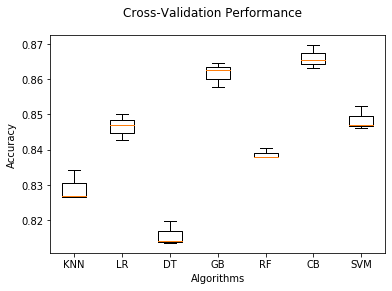

In [178]:
fig = plt.figure()
fig.suptitle('Cross-Validation Performance')
ax = fig.add_subplot()


plt.ylabel('Accuracy')
plt.xlabel('Algorithms')
#plt.ylim(0, 1)
#plt.figure(figsize=(10, 10))

plt.boxplot(results)
ax.set_xticklabels(names)



#plt.show()



#plt.scatter(x,y)

In [176]:
names = ['KNN', 'LR', 'DT', 'GB', 'RF', 'CB', 'SVM']

In [73]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

predictions = logreg.predict(X_train)

predScore = logreg.score(X_train, y_train)
print('accuracy using logreg:', predScore)

print(accuracy_score(y_train, predictions))
print(confusion_matrix(y_train, predictions))
print(classification_report(y_train, predictions))

accuracy using logreg: 0.8261446422540647
0.8261446422540647
[[24521  3115]
 [ 4092  9726]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.87     27636
           1       0.76      0.70      0.73     13818

    accuracy                           0.83     41454
   macro avg       0.81      0.80      0.80     41454
weighted avg       0.82      0.83      0.82     41454



In [74]:

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
predictions = logreg.predict(X_test)

predScore = logreg.score(X_test, y_test)
print('accuracy using logreg:', predScore)

print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))



accuracy using logreg: 0.8416875067956943
0.8416875067956943
[[6142  788]
 [ 668 1599]]
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      6930
           1       0.67      0.71      0.69      2267

    accuracy                           0.84      9197
   macro avg       0.79      0.80      0.79      9197
weighted avg       0.84      0.84      0.84      9197



In [75]:

logreg = KNeighborsClassifier() # use knn with pca to increase efficiency google for det.
logreg.fit(X_train, y_train)

predictions = logreg.predict(X_train)

predScore = logreg.score(X_train, y_train)
print('accuracy using knn:', predScore)

print(accuracy_score(y_train, predictions))
print(confusion_matrix(y_train, predictions))
print(classification_report(y_train, predictions))



accuracy using knn: 0.8804457953394124
0.8804457953394124
[[25002  2634]
 [ 2322 11496]]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91     27636
           1       0.81      0.83      0.82     13818

    accuracy                           0.88     41454
   macro avg       0.86      0.87      0.87     41454
weighted avg       0.88      0.88      0.88     41454



In [76]:

logreg = KNeighborsClassifier() # use knn with pca to increase efficiency google for det.
logreg.fit(X_train, y_train)
predictions = logreg.predict(X_test)

predScore = logreg.score(X_test, y_test)
print('accuracy using knn:', predScore)

print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))



accuracy using knn: 0.822550831792976
0.822550831792976
[[6022  908]
 [ 724 1543]]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      6930
           1       0.63      0.68      0.65      2267

    accuracy                           0.82      9197
   macro avg       0.76      0.77      0.77      9197
weighted avg       0.83      0.82      0.82      9197



In [77]:

logreg = DecisionTreeClassifier(criterion='entropy') 
logreg.fit(X_train, y_train)

predictions = logreg.predict(X_train)

predScore = logreg.score(X_train, y_train)
print('accuracy using dec tree:', predScore)

print(accuracy_score(y_train, predictions))
print(confusion_matrix(y_train, predictions))
print(classification_report(y_train, predictions))



accuracy using dec tree: 0.9665412264196459
0.9665412264196459
[[27287   349]
 [ 1038 12780]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     27636
           1       0.97      0.92      0.95     13818

    accuracy                           0.97     41454
   macro avg       0.97      0.96      0.96     41454
weighted avg       0.97      0.97      0.97     41454



In [78]:

logreg = DecisionTreeClassifier(criterion='entropy') 
logreg.fit(X_train, y_train)
predictions = logreg.predict(X_test)

predScore = logreg.score(X_test, y_test)
print('accuracy using dec tree:', predScore)

print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))



accuracy using dec tree: 0.822659562900946
0.822659562900946
[[6121  809]
 [ 822 1445]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      6930
           1       0.64      0.64      0.64      2267

    accuracy                           0.82      9197
   macro avg       0.76      0.76      0.76      9197
weighted avg       0.82      0.82      0.82      9197



In [79]:

logreg = DecisionTreeClassifier(criterion='gini') 
dec = logreg.fit(X_train, y_train)

predictions = logreg.predict(X_train)

predScore = logreg.score(X_train, y_train)
print('accuracy using dec tree:', predScore)

print(accuracy_score(y_train, predictions))
print(confusion_matrix(y_train, predictions))
print(classification_report(y_train, predictions))



accuracy using dec tree: 0.9665412264196459
0.9665412264196459
[[27287   349]
 [ 1038 12780]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     27636
           1       0.97      0.92      0.95     13818

    accuracy                           0.97     41454
   macro avg       0.97      0.96      0.96     41454
weighted avg       0.97      0.97      0.97     41454



In [80]:

logreg = DecisionTreeClassifier(criterion='gini') 
dec = logreg.fit(X_train, y_train)
predictions = logreg.predict(X_test)

predScore = logreg.score(X_test, y_test)
print('accuracy using dec tree:', predScore)

print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))



accuracy using dec tree: 0.8143959986952267
0.8143959986952267
[[6038  892]
 [ 815 1452]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      6930
           1       0.62      0.64      0.63      2267

    accuracy                           0.81      9197
   macro avg       0.75      0.76      0.75      9197
weighted avg       0.82      0.81      0.82      9197



In [82]:

logreg = GaussianNB()
logreg.fit(X_train, y_train)

predictions = logreg.predict(X_train)

predScore = logreg.score(X_train, y_train)
print('accuracy using gaussian:', predScore)

print(accuracy_score(y_train, predictions))
print(confusion_matrix(y_train, predictions))
print(classification_report(y_train, predictions))


accuracy using gaussian: 0.7949775654942828
0.7949775654942828
[[21005  6631]
 [ 1868 11950]]
              precision    recall  f1-score   support

           0       0.92      0.76      0.83     27636
           1       0.64      0.86      0.74     13818

    accuracy                           0.79     41454
   macro avg       0.78      0.81      0.78     41454
weighted avg       0.83      0.79      0.80     41454



In [83]:

logreg = GaussianNB()
logreg.fit(X_train, y_train)
predictions = logreg.predict(X_test)

predScore = logreg.score(X_test, y_test)
print('accuracy using gaussian:', predScore)

print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))


accuracy using gaussian: 0.7822115907361096
0.7822115907361096
[[5261 1669]
 [ 334 1933]]
              precision    recall  f1-score   support

           0       0.94      0.76      0.84      6930
           1       0.54      0.85      0.66      2267

    accuracy                           0.78      9197
   macro avg       0.74      0.81      0.75      9197
weighted avg       0.84      0.78      0.80      9197



In [84]:
gb = GradientBoostingClassifier(learning_rate=0.05, n_estimators=1500,max_depth=5, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)  ## more tuning
gb.fit(X_train, y_train)

predictions = gb.predict(X_train)
predScore = gb.score(X_train, y_train)
print('accuracy using gradientboost:', predScore)

print(accuracy_score(y_train, predictions))
print(confusion_matrix(y_train, predictions))
print(classification_report(y_train, predictions))

accuracy using gradientboost: 0.8973319824383654
0.8973319824383654
[[25750  1886]
 [ 2370 11448]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.92     27636
           1       0.86      0.83      0.84     13818

    accuracy                           0.90     41454
   macro avg       0.89      0.88      0.88     41454
weighted avg       0.90      0.90      0.90     41454



In [85]:
gb = GradientBoostingClassifier(learning_rate=0.05, n_estimators=1500,max_depth=5, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)  ## more tuning
gb.fit(X_train, y_train)
predictions = gb.predict(X_test)
predScore = gb.score(X_test, y_test)
print('accuracy using gradientboost:', predScore)

print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

accuracy using gradientboost: 0.8653908883331521
0.8653908883331521
[[6335  595]
 [ 643 1624]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      6930
           1       0.73      0.72      0.72      2267

    accuracy                           0.87      9197
   macro avg       0.82      0.82      0.82      9197
weighted avg       0.86      0.87      0.86      9197



In [86]:
rf = RandomForestClassifier(n_estimators=50, oob_score=True, n_jobs=-1)
rf.fit(X_train, y_train)

predictions = rf.predict(X_train)
predScore = rf.score(X_train, y_train)
print('accuracy using randomforest:', predScore)

print(accuracy_score(y_train, predictions))
print(confusion_matrix(y_train, predictions))
print(classification_report(y_train, predictions))

accuracy using randomforest: 0.966251748926521
0.966251748926521
[[27011   625]
 [  774 13044]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     27636
           1       0.95      0.94      0.95     13818

    accuracy                           0.97     41454
   macro avg       0.96      0.96      0.96     41454
weighted avg       0.97      0.97      0.97     41454



In [87]:
rf = RandomForestClassifier(n_estimators=50, oob_score=True, n_jobs=-1)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)
predScore = rf.score(X_test, y_test)
print('accuracy using randomforest:', predScore)

print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

accuracy using randomforest: 0.8415787756877242
0.8415787756877242
[[6245  685]
 [ 772 1495]]
              precision    recall  f1-score   support

           0       0.89      0.90      0.90      6930
           1       0.69      0.66      0.67      2267

    accuracy                           0.84      9197
   macro avg       0.79      0.78      0.78      9197
weighted avg       0.84      0.84      0.84      9197



In [88]:
rf = RandomForestClassifier(n_estimators=75, oob_score=True, n_jobs=-1)
rf.fit(X_train, y_train)

predictions = rf.predict(X_train)
predScore = rf.score(X_train, y_train)
print('accuracy using randomforest:', predScore)

print(accuracy_score(y_train, predictions))
print(confusion_matrix(y_train, predictions))
print(classification_report(y_train, predictions))

accuracy using randomforest: 0.9664447339219375
0.9664447339219375
[[26991   645]
 [  746 13072]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     27636
           1       0.95      0.95      0.95     13818

    accuracy                           0.97     41454
   macro avg       0.96      0.96      0.96     41454
weighted avg       0.97      0.97      0.97     41454



In [89]:
rf = RandomForestClassifier(n_estimators=75, oob_score=True, n_jobs=-1)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)
predScore = rf.score(X_test, y_test)
print('accuracy using randomforest:', predScore)

print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

accuracy using randomforest: 0.8421224312275742
0.8421224312275742
[[6248  682]
 [ 770 1497]]
              precision    recall  f1-score   support

           0       0.89      0.90      0.90      6930
           1       0.69      0.66      0.67      2267

    accuracy                           0.84      9197
   macro avg       0.79      0.78      0.78      9197
weighted avg       0.84      0.84      0.84      9197



In [90]:

logreg = CatBoostClassifier(learning_rate=0.04, n_estimators=1250,max_depth=4, subsample=1, random_state=10)  ## more tuning
logreg.fit(X_train, y_train)

predictions = logreg.predict(X_train)

predScore = logreg.score(X_train, y_train)
print('accuracy using cat boost:', predScore)
print('Confusion Matrix:')
print(confusion_matrix(y_train, predictions))
print('Classification Report:')
print(classification_report(y_train, predictions))

0:	learn: 0.6600295	total: 18.7ms	remaining: 23.4s
1:	learn: 0.6287696	total: 28.5ms	remaining: 17.8s
2:	learn: 0.6022427	total: 36.1ms	remaining: 15s
3:	learn: 0.5800398	total: 42.9ms	remaining: 13.4s
4:	learn: 0.5596837	total: 50ms	remaining: 12.5s
5:	learn: 0.5406159	total: 57.6ms	remaining: 11.9s
6:	learn: 0.5256868	total: 64.3ms	remaining: 11.4s
7:	learn: 0.5107211	total: 71.6ms	remaining: 11.1s
8:	learn: 0.4990364	total: 78.7ms	remaining: 10.8s
9:	learn: 0.4872570	total: 85.8ms	remaining: 10.6s
10:	learn: 0.4787745	total: 93.4ms	remaining: 10.5s
11:	learn: 0.4707940	total: 101ms	remaining: 10.4s
12:	learn: 0.4631231	total: 108ms	remaining: 10.3s
13:	learn: 0.4568390	total: 115ms	remaining: 10.2s
14:	learn: 0.4518349	total: 121ms	remaining: 10s
15:	learn: 0.4458383	total: 128ms	remaining: 9.9s
16:	learn: 0.4413264	total: 135ms	remaining: 9.8s
17:	learn: 0.4367198	total: 141ms	remaining: 9.68s
18:	learn: 0.4312844	total: 148ms	remaining: 9.61s
19:	learn: 0.4264830	total: 155ms	rema

164:	learn: 0.3362712	total: 1.46s	remaining: 9.58s
165:	learn: 0.3361474	total: 1.47s	remaining: 9.62s
166:	learn: 0.3360940	total: 1.49s	remaining: 9.66s
167:	learn: 0.3359834	total: 1.5s	remaining: 9.65s
168:	learn: 0.3358339	total: 1.5s	remaining: 9.63s
169:	learn: 0.3355801	total: 1.51s	remaining: 9.61s
170:	learn: 0.3354628	total: 1.52s	remaining: 9.59s
171:	learn: 0.3353837	total: 1.53s	remaining: 9.56s
172:	learn: 0.3352039	total: 1.53s	remaining: 9.54s
173:	learn: 0.3349916	total: 1.54s	remaining: 9.52s
174:	learn: 0.3349039	total: 1.55s	remaining: 9.51s
175:	learn: 0.3348299	total: 1.55s	remaining: 9.49s
176:	learn: 0.3347170	total: 1.56s	remaining: 9.47s
177:	learn: 0.3345598	total: 1.57s	remaining: 9.45s
178:	learn: 0.3344033	total: 1.57s	remaining: 9.43s
179:	learn: 0.3342769	total: 1.58s	remaining: 9.41s
180:	learn: 0.3341836	total: 1.59s	remaining: 9.39s
181:	learn: 0.3339755	total: 1.6s	remaining: 9.37s
182:	learn: 0.3339004	total: 1.6s	remaining: 9.35s
183:	learn: 0.33

337:	learn: 0.3141050	total: 2.88s	remaining: 7.78s
338:	learn: 0.3139601	total: 2.9s	remaining: 7.79s
339:	learn: 0.3139166	total: 2.91s	remaining: 7.79s
340:	learn: 0.3138381	total: 2.92s	remaining: 7.78s
341:	learn: 0.3137789	total: 2.93s	remaining: 7.77s
342:	learn: 0.3137031	total: 2.93s	remaining: 7.76s
343:	learn: 0.3134617	total: 2.94s	remaining: 7.75s
344:	learn: 0.3133550	total: 2.95s	remaining: 7.74s
345:	learn: 0.3132962	total: 2.96s	remaining: 7.73s
346:	learn: 0.3131056	total: 2.96s	remaining: 7.71s
347:	learn: 0.3129677	total: 2.97s	remaining: 7.7s
348:	learn: 0.3128738	total: 2.98s	remaining: 7.69s
349:	learn: 0.3128186	total: 2.98s	remaining: 7.67s
350:	learn: 0.3127318	total: 2.99s	remaining: 7.66s
351:	learn: 0.3125257	total: 3s	remaining: 7.65s
352:	learn: 0.3124214	total: 3s	remaining: 7.64s
353:	learn: 0.3122958	total: 3.01s	remaining: 7.62s
354:	learn: 0.3122468	total: 3.02s	remaining: 7.61s
355:	learn: 0.3121916	total: 3.02s	remaining: 7.6s
356:	learn: 0.3120282

516:	learn: 0.2997226	total: 4.31s	remaining: 6.11s
517:	learn: 0.2996719	total: 4.32s	remaining: 6.1s
518:	learn: 0.2996426	total: 4.32s	remaining: 6.09s
519:	learn: 0.2995644	total: 4.33s	remaining: 6.08s
520:	learn: 0.2995246	total: 4.34s	remaining: 6.07s
521:	learn: 0.2994677	total: 4.35s	remaining: 6.06s
522:	learn: 0.2994403	total: 4.36s	remaining: 6.05s
523:	learn: 0.2993719	total: 4.36s	remaining: 6.04s
524:	learn: 0.2992779	total: 4.37s	remaining: 6.04s
525:	learn: 0.2992269	total: 4.38s	remaining: 6.03s
526:	learn: 0.2991900	total: 4.39s	remaining: 6.02s
527:	learn: 0.2991488	total: 4.39s	remaining: 6.01s
528:	learn: 0.2990429	total: 4.4s	remaining: 6s
529:	learn: 0.2989582	total: 4.41s	remaining: 5.99s
530:	learn: 0.2988658	total: 4.42s	remaining: 5.98s
531:	learn: 0.2987725	total: 4.42s	remaining: 5.97s
532:	learn: 0.2987286	total: 4.43s	remaining: 5.96s
533:	learn: 0.2986905	total: 4.44s	remaining: 5.95s
534:	learn: 0.2986624	total: 4.45s	remaining: 5.94s
535:	learn: 0.298

675:	learn: 0.2918473	total: 5.54s	remaining: 4.7s
676:	learn: 0.2918281	total: 5.55s	remaining: 4.69s
677:	learn: 0.2917577	total: 5.55s	remaining: 4.69s
678:	learn: 0.2917359	total: 5.56s	remaining: 4.68s
679:	learn: 0.2916813	total: 5.57s	remaining: 4.67s
680:	learn: 0.2916619	total: 5.58s	remaining: 4.66s
681:	learn: 0.2916088	total: 5.59s	remaining: 4.65s
682:	learn: 0.2915593	total: 5.6s	remaining: 4.65s
683:	learn: 0.2915430	total: 5.61s	remaining: 4.64s
684:	learn: 0.2914990	total: 5.61s	remaining: 4.63s
685:	learn: 0.2914624	total: 5.62s	remaining: 4.62s
686:	learn: 0.2914283	total: 5.63s	remaining: 4.61s
687:	learn: 0.2914084	total: 5.63s	remaining: 4.6s
688:	learn: 0.2913902	total: 5.64s	remaining: 4.59s
689:	learn: 0.2913701	total: 5.65s	remaining: 4.58s
690:	learn: 0.2913009	total: 5.66s	remaining: 4.58s
691:	learn: 0.2912135	total: 5.66s	remaining: 4.57s
692:	learn: 0.2910870	total: 5.67s	remaining: 4.56s
693:	learn: 0.2910473	total: 5.68s	remaining: 4.55s
694:	learn: 0.2

852:	learn: 0.2832778	total: 6.99s	remaining: 3.25s
853:	learn: 0.2832208	total: 7.01s	remaining: 3.25s
854:	learn: 0.2831751	total: 7.02s	remaining: 3.24s
855:	learn: 0.2831094	total: 7.03s	remaining: 3.23s
856:	learn: 0.2830401	total: 7.03s	remaining: 3.23s
857:	learn: 0.2830070	total: 7.04s	remaining: 3.22s
858:	learn: 0.2827750	total: 7.05s	remaining: 3.21s
859:	learn: 0.2827519	total: 7.05s	remaining: 3.2s
860:	learn: 0.2827369	total: 7.06s	remaining: 3.19s
861:	learn: 0.2826208	total: 7.07s	remaining: 3.18s
862:	learn: 0.2825673	total: 7.08s	remaining: 3.17s
863:	learn: 0.2825424	total: 7.08s	remaining: 3.16s
864:	learn: 0.2825201	total: 7.09s	remaining: 3.15s
865:	learn: 0.2824952	total: 7.1s	remaining: 3.15s
866:	learn: 0.2823915	total: 7.1s	remaining: 3.14s
867:	learn: 0.2823766	total: 7.11s	remaining: 3.13s
868:	learn: 0.2823579	total: 7.12s	remaining: 3.12s
869:	learn: 0.2823480	total: 7.12s	remaining: 3.11s
870:	learn: 0.2823252	total: 7.13s	remaining: 3.1s
871:	learn: 0.28

1020:	learn: 0.2757654	total: 8.42s	remaining: 1.89s
1021:	learn: 0.2757486	total: 8.45s	remaining: 1.88s
1022:	learn: 0.2757345	total: 8.45s	remaining: 1.88s
1023:	learn: 0.2756599	total: 8.46s	remaining: 1.87s
1024:	learn: 0.2756418	total: 8.47s	remaining: 1.86s
1025:	learn: 0.2756089	total: 8.48s	remaining: 1.85s
1026:	learn: 0.2755579	total: 8.48s	remaining: 1.84s
1027:	learn: 0.2755191	total: 8.49s	remaining: 1.83s
1028:	learn: 0.2755009	total: 8.5s	remaining: 1.82s
1029:	learn: 0.2754914	total: 8.51s	remaining: 1.82s
1030:	learn: 0.2754579	total: 8.51s	remaining: 1.81s
1031:	learn: 0.2754427	total: 8.52s	remaining: 1.8s
1032:	learn: 0.2754157	total: 8.53s	remaining: 1.79s
1033:	learn: 0.2753993	total: 8.53s	remaining: 1.78s
1034:	learn: 0.2753883	total: 8.54s	remaining: 1.77s
1035:	learn: 0.2753696	total: 8.55s	remaining: 1.76s
1036:	learn: 0.2752441	total: 8.56s	remaining: 1.76s
1037:	learn: 0.2751601	total: 8.57s	remaining: 1.75s
1038:	learn: 0.2750190	total: 8.58s	remaining: 1

1179:	learn: 0.2710626	total: 10.1s	remaining: 596ms
1180:	learn: 0.2709832	total: 10.1s	remaining: 588ms
1181:	learn: 0.2709559	total: 10.1s	remaining: 580ms
1182:	learn: 0.2709464	total: 10.1s	remaining: 572ms
1183:	learn: 0.2709234	total: 10.1s	remaining: 564ms
1184:	learn: 0.2709089	total: 10.1s	remaining: 556ms
1185:	learn: 0.2708552	total: 10.2s	remaining: 548ms
1186:	learn: 0.2708411	total: 10.2s	remaining: 540ms
1187:	learn: 0.2708233	total: 10.2s	remaining: 532ms
1188:	learn: 0.2708095	total: 10.2s	remaining: 523ms
1189:	learn: 0.2708033	total: 10.2s	remaining: 515ms
1190:	learn: 0.2707868	total: 10.2s	remaining: 506ms
1191:	learn: 0.2707602	total: 10.2s	remaining: 497ms
1192:	learn: 0.2707512	total: 10.2s	remaining: 489ms
1193:	learn: 0.2707300	total: 10.2s	remaining: 480ms
1194:	learn: 0.2707148	total: 10.2s	remaining: 471ms
1195:	learn: 0.2707004	total: 10.3s	remaining: 463ms
1196:	learn: 0.2706817	total: 10.3s	remaining: 454ms
1197:	learn: 0.2706662	total: 10.3s	remaining:

In [92]:

logreg = CatBoostClassifier(learning_rate=0.04, n_estimators=1500,max_depth=4, subsample=1, random_state=10)  ## more tuning
logreg.fit(X_train, y_train)
predictions = logreg.predict(X_test)

predScore = logreg.score(X_test, y_test)
print('accuracy using cat boost:', predScore)
print('Confusion Matrix:')
print(confusion_matrix(y_test, predictions))
print('Classification Report:')
print(classification_report(y_test, predictions))

0:	learn: 0.6600295	total: 7.17ms	remaining: 10.7s
1:	learn: 0.6287696	total: 15.1ms	remaining: 11.3s
2:	learn: 0.6022427	total: 22.7ms	remaining: 11.3s
3:	learn: 0.5800398	total: 29.2ms	remaining: 10.9s
4:	learn: 0.5596837	total: 36.2ms	remaining: 10.8s
5:	learn: 0.5406159	total: 43.3ms	remaining: 10.8s
6:	learn: 0.5256868	total: 50ms	remaining: 10.7s
7:	learn: 0.5107211	total: 57ms	remaining: 10.6s
8:	learn: 0.4990364	total: 64.2ms	remaining: 10.6s
9:	learn: 0.4872570	total: 71.5ms	remaining: 10.6s
10:	learn: 0.4787745	total: 78.7ms	remaining: 10.7s
11:	learn: 0.4707940	total: 85.6ms	remaining: 10.6s
12:	learn: 0.4631231	total: 92.9ms	remaining: 10.6s
13:	learn: 0.4568390	total: 100ms	remaining: 10.6s
14:	learn: 0.4518349	total: 107ms	remaining: 10.5s
15:	learn: 0.4458383	total: 113ms	remaining: 10.5s
16:	learn: 0.4413264	total: 120ms	remaining: 10.5s
17:	learn: 0.4367198	total: 126ms	remaining: 10.4s
18:	learn: 0.4312844	total: 133ms	remaining: 10.4s
19:	learn: 0.4264830	total: 140m

178:	learn: 0.3344033	total: 1.69s	remaining: 12.5s
179:	learn: 0.3342769	total: 1.71s	remaining: 12.5s
180:	learn: 0.3341836	total: 1.72s	remaining: 12.5s
181:	learn: 0.3339755	total: 1.72s	remaining: 12.5s
182:	learn: 0.3339004	total: 1.73s	remaining: 12.5s
183:	learn: 0.3336183	total: 1.74s	remaining: 12.5s
184:	learn: 0.3335196	total: 1.75s	remaining: 12.4s
185:	learn: 0.3333484	total: 1.75s	remaining: 12.4s
186:	learn: 0.3332656	total: 1.76s	remaining: 12.4s
187:	learn: 0.3331233	total: 1.77s	remaining: 12.3s
188:	learn: 0.3330662	total: 1.77s	remaining: 12.3s
189:	learn: 0.3329901	total: 1.78s	remaining: 12.3s
190:	learn: 0.3328450	total: 1.79s	remaining: 12.3s
191:	learn: 0.3327479	total: 1.8s	remaining: 12.2s
192:	learn: 0.3326541	total: 1.8s	remaining: 12.2s
193:	learn: 0.3324902	total: 1.81s	remaining: 12.2s
194:	learn: 0.3324330	total: 1.82s	remaining: 12.2s
195:	learn: 0.3322714	total: 1.82s	remaining: 12.1s
196:	learn: 0.3321930	total: 1.83s	remaining: 12.1s
197:	learn: 0.

346:	learn: 0.3131056	total: 3.16s	remaining: 10.5s
347:	learn: 0.3129677	total: 3.17s	remaining: 10.5s
348:	learn: 0.3128738	total: 3.17s	remaining: 10.5s
349:	learn: 0.3128186	total: 3.18s	remaining: 10.5s
350:	learn: 0.3127318	total: 3.2s	remaining: 10.5s
351:	learn: 0.3125257	total: 3.21s	remaining: 10.5s
352:	learn: 0.3124214	total: 3.22s	remaining: 10.5s
353:	learn: 0.3122958	total: 3.23s	remaining: 10.5s
354:	learn: 0.3122468	total: 3.24s	remaining: 10.4s
355:	learn: 0.3121916	total: 3.25s	remaining: 10.4s
356:	learn: 0.3120282	total: 3.26s	remaining: 10.4s
357:	learn: 0.3119866	total: 3.27s	remaining: 10.4s
358:	learn: 0.3119004	total: 3.27s	remaining: 10.4s
359:	learn: 0.3118440	total: 3.28s	remaining: 10.4s
360:	learn: 0.3117900	total: 3.29s	remaining: 10.4s
361:	learn: 0.3115196	total: 3.3s	remaining: 10.4s
362:	learn: 0.3114467	total: 3.31s	remaining: 10.4s
363:	learn: 0.3113338	total: 3.31s	remaining: 10.3s
364:	learn: 0.3112460	total: 3.32s	remaining: 10.3s
365:	learn: 0.

520:	learn: 0.2995246	total: 4.57s	remaining: 8.58s
521:	learn: 0.2994677	total: 4.58s	remaining: 8.59s
522:	learn: 0.2994403	total: 4.59s	remaining: 8.58s
523:	learn: 0.2993719	total: 4.6s	remaining: 8.57s
524:	learn: 0.2992779	total: 4.61s	remaining: 8.56s
525:	learn: 0.2992269	total: 4.62s	remaining: 8.55s
526:	learn: 0.2991900	total: 4.62s	remaining: 8.53s
527:	learn: 0.2991488	total: 4.63s	remaining: 8.52s
528:	learn: 0.2990429	total: 4.64s	remaining: 8.51s
529:	learn: 0.2989582	total: 4.64s	remaining: 8.5s
530:	learn: 0.2988658	total: 4.65s	remaining: 8.48s
531:	learn: 0.2987725	total: 4.66s	remaining: 8.47s
532:	learn: 0.2987286	total: 4.66s	remaining: 8.46s
533:	learn: 0.2986905	total: 4.67s	remaining: 8.45s
534:	learn: 0.2986624	total: 4.68s	remaining: 8.44s
535:	learn: 0.2985862	total: 4.68s	remaining: 8.42s
536:	learn: 0.2985597	total: 4.69s	remaining: 8.42s
537:	learn: 0.2985268	total: 4.7s	remaining: 8.4s
538:	learn: 0.2984881	total: 4.71s	remaining: 8.39s
539:	learn: 0.29

682:	learn: 0.2915593	total: 5.79s	remaining: 6.93s
683:	learn: 0.2915430	total: 5.8s	remaining: 6.92s
684:	learn: 0.2914990	total: 5.81s	remaining: 6.91s
685:	learn: 0.2914624	total: 5.82s	remaining: 6.9s
686:	learn: 0.2914283	total: 5.83s	remaining: 6.9s
687:	learn: 0.2914084	total: 5.83s	remaining: 6.88s
688:	learn: 0.2913902	total: 5.84s	remaining: 6.88s
689:	learn: 0.2913701	total: 5.85s	remaining: 6.87s
690:	learn: 0.2913009	total: 5.86s	remaining: 6.86s
691:	learn: 0.2912135	total: 5.86s	remaining: 6.85s
692:	learn: 0.2910870	total: 5.87s	remaining: 6.84s
693:	learn: 0.2910473	total: 5.88s	remaining: 6.83s
694:	learn: 0.2910028	total: 5.88s	remaining: 6.82s
695:	learn: 0.2909741	total: 5.89s	remaining: 6.81s
696:	learn: 0.2909401	total: 5.9s	remaining: 6.79s
697:	learn: 0.2909157	total: 5.91s	remaining: 6.79s
698:	learn: 0.2908709	total: 5.91s	remaining: 6.77s
699:	learn: 0.2908568	total: 5.92s	remaining: 6.76s
700:	learn: 0.2908372	total: 5.92s	remaining: 6.75s
701:	learn: 0.29

852:	learn: 0.2832778	total: 7.42s	remaining: 5.63s
853:	learn: 0.2832208	total: 7.43s	remaining: 5.62s
854:	learn: 0.2831751	total: 7.44s	remaining: 5.61s
855:	learn: 0.2831094	total: 7.45s	remaining: 5.6s
856:	learn: 0.2830401	total: 7.46s	remaining: 5.59s
857:	learn: 0.2830070	total: 7.46s	remaining: 5.58s
858:	learn: 0.2827750	total: 7.47s	remaining: 5.58s
859:	learn: 0.2827519	total: 7.48s	remaining: 5.57s
860:	learn: 0.2827369	total: 7.49s	remaining: 5.55s
861:	learn: 0.2826208	total: 7.49s	remaining: 5.55s
862:	learn: 0.2825673	total: 7.5s	remaining: 5.54s
863:	learn: 0.2825424	total: 7.51s	remaining: 5.53s
864:	learn: 0.2825201	total: 7.51s	remaining: 5.51s
865:	learn: 0.2824952	total: 7.52s	remaining: 5.5s
866:	learn: 0.2823915	total: 7.53s	remaining: 5.5s
867:	learn: 0.2823766	total: 7.53s	remaining: 5.49s
868:	learn: 0.2823579	total: 7.54s	remaining: 5.47s
869:	learn: 0.2823480	total: 7.55s	remaining: 5.46s
870:	learn: 0.2823252	total: 7.55s	remaining: 5.46s
871:	learn: 0.28

1013:	learn: 0.2759854	total: 8.65s	remaining: 4.15s
1014:	learn: 0.2758888	total: 8.67s	remaining: 4.14s
1015:	learn: 0.2758733	total: 8.68s	remaining: 4.13s
1016:	learn: 0.2758465	total: 8.69s	remaining: 4.12s
1017:	learn: 0.2758289	total: 8.69s	remaining: 4.12s
1018:	learn: 0.2758113	total: 8.7s	remaining: 4.11s
1019:	learn: 0.2757775	total: 8.71s	remaining: 4.1s
1020:	learn: 0.2757654	total: 8.71s	remaining: 4.09s
1021:	learn: 0.2757486	total: 8.72s	remaining: 4.08s
1022:	learn: 0.2757345	total: 8.73s	remaining: 4.07s
1023:	learn: 0.2756599	total: 8.73s	remaining: 4.06s
1024:	learn: 0.2756418	total: 8.74s	remaining: 4.05s
1025:	learn: 0.2756089	total: 8.75s	remaining: 4.04s
1026:	learn: 0.2755579	total: 8.76s	remaining: 4.03s
1027:	learn: 0.2755191	total: 8.76s	remaining: 4.02s
1028:	learn: 0.2755009	total: 8.77s	remaining: 4.01s
1029:	learn: 0.2754914	total: 8.78s	remaining: 4s
1030:	learn: 0.2754579	total: 8.79s	remaining: 4s
1031:	learn: 0.2754427	total: 8.79s	remaining: 3.99s
1

1172:	learn: 0.2711455	total: 9.87s	remaining: 2.75s
1173:	learn: 0.2711391	total: 9.88s	remaining: 2.74s
1174:	learn: 0.2711343	total: 9.9s	remaining: 2.74s
1175:	learn: 0.2711269	total: 9.91s	remaining: 2.73s
1176:	learn: 0.2711144	total: 9.92s	remaining: 2.72s
1177:	learn: 0.2710993	total: 9.92s	remaining: 2.71s
1178:	learn: 0.2710775	total: 9.93s	remaining: 2.7s
1179:	learn: 0.2710626	total: 9.94s	remaining: 2.69s
1180:	learn: 0.2709832	total: 9.95s	remaining: 2.69s
1181:	learn: 0.2709559	total: 9.95s	remaining: 2.68s
1182:	learn: 0.2709464	total: 9.96s	remaining: 2.67s
1183:	learn: 0.2709234	total: 9.97s	remaining: 2.66s
1184:	learn: 0.2709089	total: 9.97s	remaining: 2.65s
1185:	learn: 0.2708552	total: 9.98s	remaining: 2.64s
1186:	learn: 0.2708411	total: 9.99s	remaining: 2.63s
1187:	learn: 0.2708233	total: 9.99s	remaining: 2.62s
1188:	learn: 0.2708095	total: 10s	remaining: 2.62s
1189:	learn: 0.2708033	total: 10s	remaining: 2.61s
1190:	learn: 0.2707868	total: 10s	remaining: 2.6s
11

1348:	learn: 0.2672800	total: 11.3s	remaining: 1.26s
1349:	learn: 0.2672659	total: 11.3s	remaining: 1.26s
1350:	learn: 0.2672178	total: 11.3s	remaining: 1.25s
1351:	learn: 0.2672046	total: 11.3s	remaining: 1.24s
1352:	learn: 0.2671887	total: 11.3s	remaining: 1.23s
1353:	learn: 0.2671647	total: 11.3s	remaining: 1.22s
1354:	learn: 0.2671525	total: 11.3s	remaining: 1.21s
1355:	learn: 0.2671377	total: 11.4s	remaining: 1.21s
1356:	learn: 0.2671185	total: 11.4s	remaining: 1.2s
1357:	learn: 0.2671135	total: 11.4s	remaining: 1.19s
1358:	learn: 0.2671006	total: 11.4s	remaining: 1.18s
1359:	learn: 0.2670938	total: 11.4s	remaining: 1.17s
1360:	learn: 0.2670814	total: 11.4s	remaining: 1.16s
1361:	learn: 0.2670704	total: 11.4s	remaining: 1.15s
1362:	learn: 0.2670588	total: 11.4s	remaining: 1.15s
1363:	learn: 0.2670214	total: 11.4s	remaining: 1.14s
1364:	learn: 0.2669783	total: 11.4s	remaining: 1.13s
1365:	learn: 0.2669666	total: 11.4s	remaining: 1.12s
1366:	learn: 0.2669541	total: 11.4s	remaining: 

In [94]:

logreg = SVC()
logreg.fit(X_train, y_train)

predictions = logreg.predict(X_train)

predScore = logreg.score(X_train, y_train)
print('accuracy using SVM:', predScore)

print(accuracy_score(y_train, predictions))
print(confusion_matrix(y_train, predictions))
print(classification_report(y_train, predictions))

accuracy using SVM: 0.8321513002364066
0.8321513002364066
[[24496  3140]
 [ 3818 10000]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88     27636
           1       0.76      0.72      0.74     13818

    accuracy                           0.83     41454
   macro avg       0.81      0.81      0.81     41454
weighted avg       0.83      0.83      0.83     41454



In [95]:

logreg = SVC()
logreg.fit(X_train, y_train)
predictions = logreg.predict(X_test)

predScore = logreg.score(X_test, y_test)
print('accuracy using SVM:', predScore)

print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

accuracy using SVM: 0.8495161465695336
0.8495161465695336
[[6147  783]
 [ 601 1666]]
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      6930
           1       0.68      0.73      0.71      2267

    accuracy                           0.85      9197
   macro avg       0.80      0.81      0.80      9197
weighted avg       0.85      0.85      0.85      9197



In [97]:
svmLinear = SVC(kernel='linear')
svmLinear.fit(X_train, y_train)
accuracy5 = svmLinear.score(X_test, y_test)
print('accuracy for linearSVM with linear kernel: ', accuracy5)


accuracy for linearSVM with linear kernel:  0.8347287158856149


In [96]:
svmLinear = SVC(kernel='rbf')
svmLinear.fit(X_train, y_train)
accuracy5 = svmLinear.score(X_test, y_test)
print('accuracy for linearSVM with linear kernel: ', accuracy5)

accuracy for linearSVM with linear kernel:  0.8495161465695336


In [ ]:
# gradient boost

In [91]:
gb = GradientBoostingClassifier(learning_rate=0.05, n_estimators=1500,max_depth=5, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
gb.fit(X_train, y_train)
predictions = gb.predict(X_test)
predScore = gb.score(X_test, y_test)
print('accuracy using gradientboost:', predScore)

print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

accuracy using gradientboost: 0.8525606175926933
0.8525606175926933
[[6103  827]
 [ 529 1738]]
              precision    recall  f1-score   support

           0       0.92      0.88      0.90      6930
           1       0.68      0.77      0.72      2267

    accuracy                           0.85      9197
   macro avg       0.80      0.82      0.81      9197
weighted avg       0.86      0.85      0.86      9197



In [82]:
# # CATboost

# clf= CatBoostClassifier(learning_rate=0.10)  # learning ratess
# clf.fit(X_train, y_train)
# predictions = clf.predict(X_test)
# predScore = clf.score(X_test, y_test)
# print('accuracy using gradientboost:', predScore)

# print(accuracy_score(y_test, predictions))
# print(confusion_matrix(y_test, predictions))
# print(classification_report(y_test, predictions))

In [69]:
# roc curve

In [ ]:

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

## Compare different values of K and N

Repeat the above experiment using the values of K and N below, and report the mean, stdDev, differece between the means, and p-value for each.  The first row has been completed for you (note that your numbers may be slightly different, since this is a stochastic process).  Also notice how long these take to finish (though you don't need to write that down).  Once the table is complete, look at it and try to see what patterns you can spot.

***

Model | Train Set (Mean & std.)  |   Test Set |  NN-stdev  | SVM-mean  |  SVM-stdDev  |  difference   |  p-value
------|----------|------------|------------|-----------|--------------|---------------|--------------
kNN     |      0.832530 (0.002642)   |       |   0.035    |  0.977    |   0.032      |     0.033     |   0.032000
Logistic Regression     | 0.823686 (0.000708)   |    0.804610   |   0.017    |  0.978    |   0.016      |     0.025     |   0.000086
Decision Trees    |      0.834379 (0.004120)   |    0.957   |   0.044    |  0.977    |   0.038      |     0.020     |   0.060000
Gaussian NB    |      0.814184 (0.002476)  |    0.956   |   0.048    |  0.976    |   0.037      |     0.020     |   0.001200
Gradient Boosting    |     0.853296 (0.001275)  |    0.959   |   0.048    |  0.978    |   0.038      |     0.019     |   8.02e-23
Random Forests   |      0.859831 (0.001257)  |    0.959   |   0.178    |  0.980    |   0.123      |     0.022     |   0.000719
Cat Boost   |     0.897474 (0.001515)  |    0.959   |   0.172    |  0.980    |   0.012      |     0.021     |   4.35e-24
SVMs   |     0.827815 (0.001843)  |    0.959   |   0.172    |  0.980    |   0.012      |     0.021     |   4.35e-24
Neural Nets   |     100  |    0.959   |   0.172    |  0.980    |   0.012      |     0.021     |   4.35e-24

## Compare different values of K and N

Repeat the above experiment using the values of K and N below, and report the mean, stdDev, differece between the means, and p-value for each.  The first row has been completed for you (note that your numbers may be slightly different, since this is a stochastic process).  Also notice how long these take to finish (though you don't need to write that down).  Once the table is complete, look at it and try to see what patterns you can spot.

***

Model | Cross-Validation (Mean & stdDev)  |   Test Set |  F1-score (0 label)  | F1-score (1 label)  |  SVM-stdDev  |  difference   |  p-value
------|----------|------------|------------|-----------|--------------|---------------|--------------
kNN     |      0.826472 (0.002631)   |   0.793520    |   0.85    |  0.64    |         | 
Logistic Regression     | 0.846432 (0.001632)   |    0.804610   |   0.86    |  0.68    |   0.016      |     0.025     |   0.000086
Decision Trees    |      0.812322 (0.001076)   |    0.809721   |   0.87    |  0.63    |   0.038      |     0.020     |   0.060000
Gradient Boost    |     0.861278 (0.002022)  |    0.852561   |   0.90    |  0.72    |   0.038      |     0.019     |   8.02e-23
Random Forests   |   0.836406 (0.001688)     |    0.834837   |   0.89    |  0.67    |   0.123      |     0.022     |   0.000719
Cat Boost   |     0.865327 (0.001295)  |    0.863325   |   0.91    |  0.73    |   0.012      |     0.021     |   4.35e-24
SVM   |     0.847915 (0.002550)  |    0.801892   |   0.86    |  0.68    |   0.012      |     0.021     |   4.35e-24
Neural Nets   |     100  |    0.959   |   0.172    |  0.980    |   0.012      |     0.021     |   4.35e-24

## Compare different values of K and N

Repeat the above experiment using the values of K and N below, and report the mean, stdDev, differece between the means, and p-value for each.  The first row has been completed for you (note that your numbers may be slightly different, since this is a stochastic process).  Also notice how long these take to finish (though you don't need to write that down).  Once the table is complete, look at it and try to see what patterns you can spot.

***

Model |  Test Set |  F1-score (0 label)  | F1-score (1 label)  |  SVM-stdDev  |  difference   |  p-value
------|----------|------------|------------|-----------|--------------|---------------
kNN     | 0.822551    |   0.88    |  0.65    |         | 
Logistic Regression     |   0.841688   |   0.89    |  0.69    |   0.016      |     0.025     |   0.000086
Decision Trees    |    0.822660   |   0.88    |  0.67    |   0.038      |     0.020     |   0.060000
Gradient Boost    |    0.865391   |   0.91    |  0.72   |   0.038      |     0.019     |   8.02e-23
Random Forests   |    0.841579   |   0.90    |  0.67    |   0.123      |     0.022     |   0.000719
Cat Boost   |  0.868327   |   0.91    |  0.73    |   0.012      |     0.021     |   4.35e-24
SVM   |     0.849516   |   0.90    |  0.71    |   0.012      |     0.021     |   4.35e-24
Neural Nets   |     100  |    0.959   |   0.172    |  0.980    |   0.012      |     0.021     |   4.35e-24

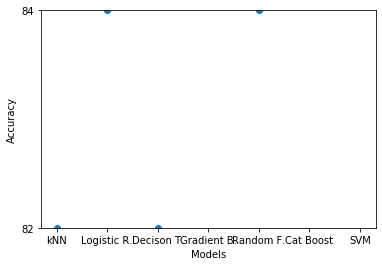

In [127]:
data = np.array([
    ['kNN', 82],
    ['Logistic R.', 84],
    ['Decison T.', 82],['Gradient B.', 86.5],['Random F.', 84],['Cat Boost', 86.9], ['SVM', 85 ]
])
x, y = data.T
#plt.figure(figsize=(9, 3))
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.ylim(0, 1)

plt.scatter(x,y)

#plt.ylim([0.0 1.0])


plt.show()



Accuracy of the GBM on test set: 0.855
              precision    recall  f1-score   support

           0       0.87      0.94      0.91      6821
           1       0.79      0.60      0.68      2376

    accuracy                           0.86      9197
   macro avg       0.83      0.77      0.79      9197
weighted avg       0.85      0.86      0.85      9197



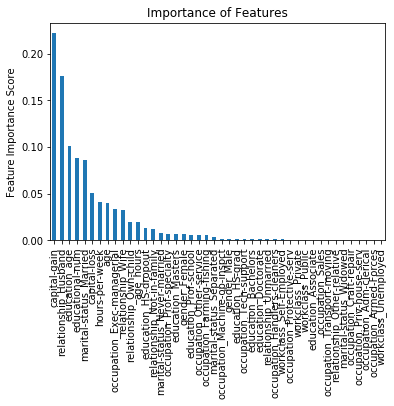

In [82]:



baseline = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
baseline.fit(X,y)
predictors=list(X)
feat_imp = pd.Series(baseline.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print('Accuracy of the GBM on test set: {:.3f}'.format(baseline.score(X_test, y_test)))
pred=baseline.predict(X_test)
print(classification_report(y_test, pred))

In [165]:
# tuning the hyerparameters

In [46]:
p_test3 = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 'n_estimators':[100,250,500,750,1000,1250,1500,1750]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(max_depth=4, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = p_test3, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(X_train,y_train)
tuning.grid_scores_, tuning.best_params_, tuning.best_score_

KeyboardInterrupt: 

In [ ]:
p_test2 = {'max_depth':[2,3,4,5,6,7] }
tuning = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=0.01,n_estimators=1500, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = p_test2, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(X_train,y_train)
tuning.grid_scores_, tuning.best_params_, tuning.best_score_

Text(0, 0.5, 'Feature Importance Score')

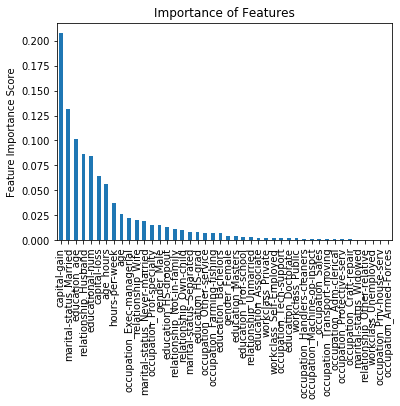

In [130]:
model1 = GradientBoostingClassifier(learning_rate=0.02, n_estimators=1500,max_depth=5, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
model1.fit(X,y)
predictors=list(X)
feat_imp = pd.Series(model1.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')

In [84]:
from catboost import CatBoostClassifier

In [85]:
clf= CatBoostClassifier(learning_rate=0.04)

clf.fit(X_train,y_train)

#pred2 = clf.predict(X_test)

predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))

0:	learn: 0.6613222	total: 22.9ms	remaining: 22.9s
1:	learn: 0.6320074	total: 39.1ms	remaining: 19.5s
2:	learn: 0.6080666	total: 59.7ms	remaining: 19.9s
3:	learn: 0.5833386	total: 82.8ms	remaining: 20.6s
4:	learn: 0.5627860	total: 101ms	remaining: 20.1s
5:	learn: 0.5450978	total: 115ms	remaining: 19.1s
6:	learn: 0.5289463	total: 141ms	remaining: 19.9s
7:	learn: 0.5143896	total: 156ms	remaining: 19.3s
8:	learn: 0.5012084	total: 169ms	remaining: 18.6s
9:	learn: 0.4896615	total: 183ms	remaining: 18.1s
10:	learn: 0.4801015	total: 199ms	remaining: 17.9s
11:	learn: 0.4716758	total: 214ms	remaining: 17.6s
12:	learn: 0.4637453	total: 241ms	remaining: 18.3s
13:	learn: 0.4562103	total: 270ms	remaining: 19s
14:	learn: 0.4494998	total: 293ms	remaining: 19.2s
15:	learn: 0.4432146	total: 314ms	remaining: 19.3s
16:	learn: 0.4388888	total: 330ms	remaining: 19.1s
17:	learn: 0.4345554	total: 343ms	remaining: 18.7s
18:	learn: 0.4305198	total: 357ms	remaining: 18.4s
19:	learn: 0.4259990	total: 380ms	remai

172:	learn: 0.3121491	total: 3.4s	remaining: 16.3s
173:	learn: 0.3119401	total: 3.43s	remaining: 16.3s
174:	learn: 0.3116474	total: 3.46s	remaining: 16.3s
175:	learn: 0.3114284	total: 3.48s	remaining: 16.3s
176:	learn: 0.3112743	total: 3.49s	remaining: 16.2s
177:	learn: 0.3111104	total: 3.51s	remaining: 16.2s
178:	learn: 0.3109797	total: 3.52s	remaining: 16.2s
179:	learn: 0.3107707	total: 3.55s	remaining: 16.2s
180:	learn: 0.3106200	total: 3.57s	remaining: 16.2s
181:	learn: 0.3104670	total: 3.58s	remaining: 16.1s
182:	learn: 0.3100848	total: 3.6s	remaining: 16.1s
183:	learn: 0.3099545	total: 3.63s	remaining: 16.1s
184:	learn: 0.3097788	total: 3.65s	remaining: 16.1s
185:	learn: 0.3096620	total: 3.67s	remaining: 16.1s
186:	learn: 0.3094342	total: 3.69s	remaining: 16s
187:	learn: 0.3091771	total: 3.71s	remaining: 16s
188:	learn: 0.3088622	total: 3.73s	remaining: 16s
189:	learn: 0.3085603	total: 3.74s	remaining: 15.9s
190:	learn: 0.3083338	total: 3.76s	remaining: 15.9s
191:	learn: 0.308016

333:	learn: 0.2741729	total: 6.14s	remaining: 12.2s
334:	learn: 0.2740143	total: 6.16s	remaining: 12.2s
335:	learn: 0.2739039	total: 6.18s	remaining: 12.2s
336:	learn: 0.2738289	total: 6.2s	remaining: 12.2s
337:	learn: 0.2737055	total: 6.21s	remaining: 12.2s
338:	learn: 0.2729806	total: 6.23s	remaining: 12.1s
339:	learn: 0.2726431	total: 6.25s	remaining: 12.1s
340:	learn: 0.2725437	total: 6.27s	remaining: 12.1s
341:	learn: 0.2724082	total: 6.29s	remaining: 12.1s
342:	learn: 0.2722566	total: 6.3s	remaining: 12.1s
343:	learn: 0.2718863	total: 6.31s	remaining: 12s
344:	learn: 0.2717440	total: 6.33s	remaining: 12s
345:	learn: 0.2716783	total: 6.35s	remaining: 12s
346:	learn: 0.2710783	total: 6.37s	remaining: 12s
347:	learn: 0.2708663	total: 6.39s	remaining: 12s
348:	learn: 0.2707249	total: 6.41s	remaining: 12s
349:	learn: 0.2704406	total: 6.43s	remaining: 11.9s
350:	learn: 0.2702331	total: 6.45s	remaining: 11.9s
351:	learn: 0.2700648	total: 6.49s	remaining: 12s
352:	learn: 0.2699772	total:

494:	learn: 0.2421406	total: 9.58s	remaining: 9.77s
495:	learn: 0.2420042	total: 9.6s	remaining: 9.76s
496:	learn: 0.2418046	total: 9.62s	remaining: 9.74s
497:	learn: 0.2415453	total: 9.64s	remaining: 9.72s
498:	learn: 0.2412624	total: 9.66s	remaining: 9.7s
499:	learn: 0.2411731	total: 9.67s	remaining: 9.67s
500:	learn: 0.2410713	total: 9.68s	remaining: 9.64s
501:	learn: 0.2409263	total: 9.7s	remaining: 9.62s
502:	learn: 0.2408356	total: 9.72s	remaining: 9.6s
503:	learn: 0.2407840	total: 9.73s	remaining: 9.58s
504:	learn: 0.2407256	total: 9.75s	remaining: 9.56s
505:	learn: 0.2405840	total: 9.77s	remaining: 9.54s
506:	learn: 0.2402997	total: 9.79s	remaining: 9.52s
507:	learn: 0.2401807	total: 9.81s	remaining: 9.5s
508:	learn: 0.2401019	total: 9.83s	remaining: 9.48s
509:	learn: 0.2400738	total: 9.84s	remaining: 9.46s
510:	learn: 0.2398953	total: 9.86s	remaining: 9.44s
511:	learn: 0.2398315	total: 9.87s	remaining: 9.41s
512:	learn: 0.2396813	total: 9.89s	remaining: 9.39s
513:	learn: 0.239

658:	learn: 0.2290810	total: 12.8s	remaining: 6.61s
659:	learn: 0.2290533	total: 12.8s	remaining: 6.59s
660:	learn: 0.2290333	total: 12.8s	remaining: 6.57s
661:	learn: 0.2288796	total: 12.8s	remaining: 6.55s
662:	learn: 0.2288431	total: 12.9s	remaining: 6.53s
663:	learn: 0.2285880	total: 12.9s	remaining: 6.51s
664:	learn: 0.2285690	total: 12.9s	remaining: 6.49s
665:	learn: 0.2284380	total: 12.9s	remaining: 6.47s
666:	learn: 0.2283879	total: 12.9s	remaining: 6.45s
667:	learn: 0.2283435	total: 12.9s	remaining: 6.43s
668:	learn: 0.2283064	total: 12.9s	remaining: 6.4s
669:	learn: 0.2282254	total: 13s	remaining: 6.38s
670:	learn: 0.2282024	total: 13s	remaining: 6.37s
671:	learn: 0.2281309	total: 13s	remaining: 6.37s
672:	learn: 0.2280141	total: 13.1s	remaining: 6.36s
673:	learn: 0.2279078	total: 13.1s	remaining: 6.34s
674:	learn: 0.2277918	total: 13.1s	remaining: 6.32s
675:	learn: 0.2277184	total: 13.1s	remaining: 6.3s
676:	learn: 0.2276973	total: 13.2s	remaining: 6.28s
677:	learn: 0.227631

829:	learn: 0.2200302	total: 15.5s	remaining: 3.18s
830:	learn: 0.2199633	total: 15.5s	remaining: 3.16s
831:	learn: 0.2199275	total: 15.6s	remaining: 3.14s
832:	learn: 0.2198895	total: 15.6s	remaining: 3.12s
833:	learn: 0.2198665	total: 15.6s	remaining: 3.1s
834:	learn: 0.2197934	total: 15.6s	remaining: 3.08s
835:	learn: 0.2197627	total: 15.6s	remaining: 3.06s
836:	learn: 0.2197348	total: 15.6s	remaining: 3.04s
837:	learn: 0.2196920	total: 15.6s	remaining: 3.02s
838:	learn: 0.2196517	total: 15.6s	remaining: 3s
839:	learn: 0.2196123	total: 15.7s	remaining: 2.98s
840:	learn: 0.2195689	total: 15.7s	remaining: 2.96s
841:	learn: 0.2195534	total: 15.7s	remaining: 2.94s
842:	learn: 0.2195110	total: 15.7s	remaining: 2.92s
843:	learn: 0.2194793	total: 15.7s	remaining: 2.91s
844:	learn: 0.2194465	total: 15.8s	remaining: 2.89s
845:	learn: 0.2194014	total: 15.8s	remaining: 2.87s
846:	learn: 0.2192817	total: 15.8s	remaining: 2.86s
847:	learn: 0.2192297	total: 15.9s	remaining: 2.84s
848:	learn: 0.21

989:	learn: 0.2117812	total: 17.8s	remaining: 180ms
990:	learn: 0.2116833	total: 17.8s	remaining: 162ms
991:	learn: 0.2116184	total: 17.9s	remaining: 144ms
992:	learn: 0.2115348	total: 17.9s	remaining: 126ms
993:	learn: 0.2114918	total: 17.9s	remaining: 108ms
994:	learn: 0.2114246	total: 17.9s	remaining: 89.9ms
995:	learn: 0.2113935	total: 17.9s	remaining: 71.9ms
996:	learn: 0.2113462	total: 17.9s	remaining: 53.9ms
997:	learn: 0.2112802	total: 17.9s	remaining: 35.9ms
998:	learn: 0.2112441	total: 17.9s	remaining: 18ms
999:	learn: 0.2111782	total: 18s	remaining: 0us
0.854409046428183


In [86]:

print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.854409046428183
[[6067  754]
 [ 585 1791]]
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      6821
           1       0.70      0.75      0.73      2376

    accuracy                           0.85      9197
   macro avg       0.81      0.82      0.81      9197
weighted avg       0.86      0.85      0.86      9197



In [98]:


baseline = CatBoostClassifier(learning_rate=0.04, n_estimators=1500,max_depth=4, subsample=1, random_state=10)  ## more tuning
baseline.fit(X,y)

0:	learn: 0.6531148	total: 7.67ms	remaining: 11.5s
1:	learn: 0.6201693	total: 14.5ms	remaining: 10.9s
2:	learn: 0.5897570	total: 20.7ms	remaining: 10.3s
3:	learn: 0.5622078	total: 27.2ms	remaining: 10.2s
4:	learn: 0.5376606	total: 33.6ms	remaining: 10s
5:	learn: 0.5176688	total: 40.4ms	remaining: 10.1s
6:	learn: 0.5011589	total: 46.9ms	remaining: 10s
7:	learn: 0.4836820	total: 54.5ms	remaining: 10.2s
8:	learn: 0.4698663	total: 61.2ms	remaining: 10.1s
9:	learn: 0.4560660	total: 67.2ms	remaining: 10s
10:	learn: 0.4449958	total: 73.5ms	remaining: 9.95s
11:	learn: 0.4353999	total: 80ms	remaining: 9.91s
12:	learn: 0.4269832	total: 86.4ms	remaining: 9.88s
13:	learn: 0.4185514	total: 92.7ms	remaining: 9.84s
14:	learn: 0.4117177	total: 99ms	remaining: 9.8s
15:	learn: 0.4051409	total: 105ms	remaining: 9.71s
16:	learn: 0.3987455	total: 111ms	remaining: 9.64s
17:	learn: 0.3932341	total: 116ms	remaining: 9.55s
18:	learn: 0.3896400	total: 122ms	remaining: 9.51s
19:	learn: 0.3856720	total: 128ms	rem

175:	learn: 0.3028878	total: 1.43s	remaining: 10.8s
176:	learn: 0.3027516	total: 1.45s	remaining: 10.8s
177:	learn: 0.3026677	total: 1.46s	remaining: 10.8s
178:	learn: 0.3025781	total: 1.47s	remaining: 10.8s
179:	learn: 0.3024469	total: 1.47s	remaining: 10.8s
180:	learn: 0.3022267	total: 1.48s	remaining: 10.8s
181:	learn: 0.3021403	total: 1.48s	remaining: 10.8s
182:	learn: 0.3019902	total: 1.49s	remaining: 10.7s
183:	learn: 0.3017360	total: 1.5s	remaining: 10.7s
184:	learn: 0.3016402	total: 1.5s	remaining: 10.7s
185:	learn: 0.3015334	total: 1.52s	remaining: 10.7s
186:	learn: 0.3014714	total: 1.52s	remaining: 10.7s
187:	learn: 0.3013719	total: 1.53s	remaining: 10.7s
188:	learn: 0.3012754	total: 1.53s	remaining: 10.7s
189:	learn: 0.3012285	total: 1.54s	remaining: 10.6s
190:	learn: 0.3010113	total: 1.55s	remaining: 10.6s
191:	learn: 0.3009499	total: 1.55s	remaining: 10.6s
192:	learn: 0.3008189	total: 1.56s	remaining: 10.6s
193:	learn: 0.3007546	total: 1.57s	remaining: 10.5s
194:	learn: 0.

343:	learn: 0.2887315	total: 2.81s	remaining: 9.44s
344:	learn: 0.2887005	total: 2.83s	remaining: 9.46s
345:	learn: 0.2886542	total: 2.84s	remaining: 9.48s
346:	learn: 0.2886193	total: 2.85s	remaining: 9.47s
347:	learn: 0.2885557	total: 2.86s	remaining: 9.46s
348:	learn: 0.2885333	total: 2.87s	remaining: 9.45s
349:	learn: 0.2884828	total: 2.87s	remaining: 9.44s
350:	learn: 0.2884502	total: 2.88s	remaining: 9.43s
351:	learn: 0.2882617	total: 2.89s	remaining: 9.42s
352:	learn: 0.2881928	total: 2.89s	remaining: 9.4s
353:	learn: 0.2881649	total: 2.9s	remaining: 9.39s
354:	learn: 0.2881025	total: 2.91s	remaining: 9.38s
355:	learn: 0.2880273	total: 2.91s	remaining: 9.37s
356:	learn: 0.2879759	total: 2.92s	remaining: 9.35s
357:	learn: 0.2879518	total: 2.93s	remaining: 9.34s
358:	learn: 0.2879052	total: 2.93s	remaining: 9.32s
359:	learn: 0.2878709	total: 2.94s	remaining: 9.31s
360:	learn: 0.2878381	total: 2.95s	remaining: 9.3s
361:	learn: 0.2877927	total: 2.95s	remaining: 9.28s
362:	learn: 0.2

514:	learn: 0.2816484	total: 4.04s	remaining: 7.73s
515:	learn: 0.2816105	total: 4.05s	remaining: 7.73s
516:	learn: 0.2815937	total: 4.07s	remaining: 7.74s
517:	learn: 0.2815608	total: 4.08s	remaining: 7.74s
518:	learn: 0.2815314	total: 4.09s	remaining: 7.73s
519:	learn: 0.2815066	total: 4.1s	remaining: 7.72s
520:	learn: 0.2814852	total: 4.1s	remaining: 7.71s
521:	learn: 0.2814612	total: 4.11s	remaining: 7.7s
522:	learn: 0.2814368	total: 4.12s	remaining: 7.69s
523:	learn: 0.2814161	total: 4.12s	remaining: 7.68s
524:	learn: 0.2814031	total: 4.13s	remaining: 7.67s
525:	learn: 0.2813807	total: 4.14s	remaining: 7.66s
526:	learn: 0.2813440	total: 4.14s	remaining: 7.65s
527:	learn: 0.2813134	total: 4.15s	remaining: 7.64s
528:	learn: 0.2812991	total: 4.16s	remaining: 7.63s
529:	learn: 0.2812371	total: 4.16s	remaining: 7.62s
530:	learn: 0.2812179	total: 4.17s	remaining: 7.61s
531:	learn: 0.2811444	total: 4.17s	remaining: 7.59s
532:	learn: 0.2811258	total: 4.18s	remaining: 7.58s
533:	learn: 0.2

691:	learn: 0.2771109	total: 5.28s	remaining: 6.16s
692:	learn: 0.2770963	total: 5.29s	remaining: 6.16s
693:	learn: 0.2770816	total: 5.31s	remaining: 6.16s
694:	learn: 0.2770513	total: 5.31s	remaining: 6.15s
695:	learn: 0.2770319	total: 5.32s	remaining: 6.15s
696:	learn: 0.2770168	total: 5.33s	remaining: 6.14s
697:	learn: 0.2769801	total: 5.33s	remaining: 6.13s
698:	learn: 0.2769612	total: 5.34s	remaining: 6.12s
699:	learn: 0.2769402	total: 5.35s	remaining: 6.11s
700:	learn: 0.2769163	total: 5.35s	remaining: 6.1s
701:	learn: 0.2768185	total: 5.36s	remaining: 6.09s
702:	learn: 0.2767308	total: 5.37s	remaining: 6.08s
703:	learn: 0.2767083	total: 5.38s	remaining: 6.08s
704:	learn: 0.2766780	total: 5.38s	remaining: 6.07s
705:	learn: 0.2766707	total: 5.39s	remaining: 6.06s
706:	learn: 0.2766485	total: 5.4s	remaining: 6.05s
707:	learn: 0.2766372	total: 5.4s	remaining: 6.04s
708:	learn: 0.2766188	total: 5.41s	remaining: 6.04s
709:	learn: 0.2766098	total: 5.42s	remaining: 6.03s
710:	learn: 0.2

878:	learn: 0.2733203	total: 6.67s	remaining: 4.71s
879:	learn: 0.2733062	total: 6.68s	remaining: 4.71s
880:	learn: 0.2732948	total: 6.69s	remaining: 4.7s
881:	learn: 0.2732821	total: 6.69s	remaining: 4.69s
882:	learn: 0.2732714	total: 6.7s	remaining: 4.68s
883:	learn: 0.2732516	total: 6.71s	remaining: 4.67s
884:	learn: 0.2732447	total: 6.72s	remaining: 4.67s
885:	learn: 0.2732301	total: 6.72s	remaining: 4.66s
886:	learn: 0.2732209	total: 6.73s	remaining: 4.65s
887:	learn: 0.2732050	total: 6.74s	remaining: 4.64s
888:	learn: 0.2731909	total: 6.74s	remaining: 4.63s
889:	learn: 0.2731229	total: 6.75s	remaining: 4.62s
890:	learn: 0.2731074	total: 6.75s	remaining: 4.62s
891:	learn: 0.2730980	total: 6.76s	remaining: 4.61s
892:	learn: 0.2730906	total: 6.77s	remaining: 4.6s
893:	learn: 0.2730814	total: 6.77s	remaining: 4.59s
894:	learn: 0.2730718	total: 6.78s	remaining: 4.58s
895:	learn: 0.2730636	total: 6.79s	remaining: 4.57s
896:	learn: 0.2730471	total: 6.79s	remaining: 4.57s
897:	learn: 0.2

1036:	learn: 0.2707193	total: 7.88s	remaining: 3.52s
1037:	learn: 0.2707032	total: 7.89s	remaining: 3.51s
1038:	learn: 0.2706816	total: 7.89s	remaining: 3.5s
1039:	learn: 0.2706688	total: 7.9s	remaining: 3.49s
1040:	learn: 0.2706580	total: 7.92s	remaining: 3.49s
1041:	learn: 0.2706440	total: 7.92s	remaining: 3.48s
1042:	learn: 0.2706300	total: 7.93s	remaining: 3.48s
1043:	learn: 0.2706089	total: 7.94s	remaining: 3.47s
1044:	learn: 0.2706000	total: 7.95s	remaining: 3.46s
1045:	learn: 0.2705911	total: 7.96s	remaining: 3.46s
1046:	learn: 0.2705780	total: 7.97s	remaining: 3.45s
1047:	learn: 0.2705620	total: 7.97s	remaining: 3.44s
1048:	learn: 0.2705578	total: 7.98s	remaining: 3.43s
1049:	learn: 0.2705483	total: 7.99s	remaining: 3.42s
1050:	learn: 0.2705328	total: 8s	remaining: 3.42s
1051:	learn: 0.2705194	total: 8s	remaining: 3.41s
1052:	learn: 0.2705067	total: 8.01s	remaining: 3.4s
1053:	learn: 0.2704921	total: 8.02s	remaining: 3.39s
1054:	learn: 0.2704767	total: 8.02s	remaining: 3.38s
10

1192:	learn: 0.2683362	total: 9.1s	remaining: 2.34s
1193:	learn: 0.2683194	total: 9.12s	remaining: 2.34s
1194:	learn: 0.2683037	total: 9.13s	remaining: 2.33s
1195:	learn: 0.2682868	total: 9.16s	remaining: 2.33s
1196:	learn: 0.2682732	total: 9.16s	remaining: 2.32s
1197:	learn: 0.2682652	total: 9.18s	remaining: 2.31s
1198:	learn: 0.2682544	total: 9.2s	remaining: 2.31s
1199:	learn: 0.2682466	total: 9.22s	remaining: 2.3s
1200:	learn: 0.2682428	total: 9.24s	remaining: 2.3s
1201:	learn: 0.2682304	total: 9.25s	remaining: 2.29s
1202:	learn: 0.2682198	total: 9.27s	remaining: 2.29s
1203:	learn: 0.2682081	total: 9.28s	remaining: 2.28s
1204:	learn: 0.2681992	total: 9.3s	remaining: 2.28s
1205:	learn: 0.2681825	total: 9.32s	remaining: 2.27s
1206:	learn: 0.2681746	total: 9.33s	remaining: 2.27s
1207:	learn: 0.2681628	total: 9.35s	remaining: 2.26s
1208:	learn: 0.2681557	total: 9.36s	remaining: 2.25s
1209:	learn: 0.2681424	total: 9.37s	remaining: 2.25s
1210:	learn: 0.2681325	total: 9.38s	remaining: 2.24

1370:	learn: 0.2660264	total: 10.5s	remaining: 990ms
1371:	learn: 0.2660145	total: 10.5s	remaining: 984ms
1372:	learn: 0.2660040	total: 10.6s	remaining: 976ms
1373:	learn: 0.2659983	total: 10.6s	remaining: 969ms
1374:	learn: 0.2659956	total: 10.6s	remaining: 961ms
1375:	learn: 0.2659806	total: 10.6s	remaining: 953ms
1376:	learn: 0.2659760	total: 10.6s	remaining: 946ms
1377:	learn: 0.2659687	total: 10.6s	remaining: 938ms
1378:	learn: 0.2659572	total: 10.6s	remaining: 930ms
1379:	learn: 0.2659433	total: 10.6s	remaining: 922ms
1380:	learn: 0.2659334	total: 10.6s	remaining: 915ms
1381:	learn: 0.2659222	total: 10.6s	remaining: 907ms
1382:	learn: 0.2659094	total: 10.6s	remaining: 899ms
1383:	learn: 0.2658978	total: 10.6s	remaining: 892ms
1384:	learn: 0.2658882	total: 10.6s	remaining: 884ms
1385:	learn: 0.2658771	total: 10.7s	remaining: 876ms
1386:	learn: 0.2658632	total: 10.7s	remaining: 869ms
1387:	learn: 0.2658517	total: 10.7s	remaining: 861ms
1388:	learn: 0.2658434	total: 10.7s	remaining:

Text(0, 0.5, 'Feature Importance Score')

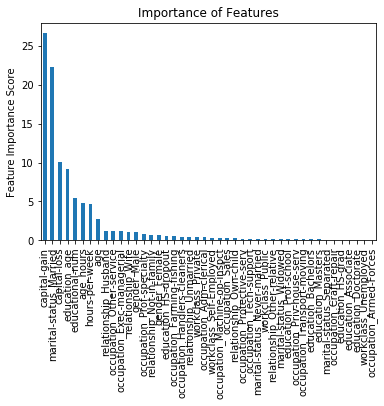

In [99]:

predictors=list(X)
feat_imp = pd.Series(baseline.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')

In [168]:
XGBclf= XGBClassifier()
X_train = X_train.values
X_test = X_test.values

XGBclf.fit(X_train,y_train)


predictions = XGBclf.predict(X_test)
print(accuracy_score(y_test, predictions))

print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [350]:
#nn

In [105]:
def create_model():
    model = Sequential()
    model.add(Dense(300,
                    input_dim=X_train.shape[1],
                    activation="relu"))
    model.add(Dense(300,
                    activation="relu"))
    model.add(Dense(300,
                    activation="relu"))
    
    model.add(Dense(300,
                    activation="relu"))
    model.add(Dense(300,
                    activation="relu"))
    model.add(Dense(2, activation="softmax"))

    # Compile model
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
    return model

In [106]:
estimator = KerasClassifier(create_model, epochs=15, batch_size=50, verbose=False)


In [107]:

Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

In [108]:
results = estimator.fit(X_train, Y_train, validation_data=(X_test, Y_test))
print("Score: {}".format(estimator.score(X_test, Y_test)))

Score: 0.8416875004768372


In [41]:

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn import neighbors
from sklearn import svm
from sklearn import tree



In [118]:
rkf = RepeatedKFold(n_splits = 2, n_repeats = 10)


treeclf = logreg = DecisionTreeClassifier(criterion='gini') 
nn = neighbors.KNeighborsClassifier(n_neighbors=1, metric='euclidean')
rf = RandomForestClassifier(n_estimators=75, oob_score=True, n_jobs=-1)
#svmLinear = svm.SVC(kernel='linear')

nnScores = cross_val_score(nn, X, y, cv = rkf)
#svmScores = cross_val_score(svmLinear, X, y, cv = rkf)
randomforestScores = cross_val_score(rf, X, y, cv = rkf)
treeScores = cross_val_score(treeclf, X, y, cv = rkf)


print('Nearest Neighbor: mean =', nnScores.mean(), ', stdDev =', nnScores.std())
#print('Linear SVM: mean =', svmScores.mean(), ', stdDev =', svmScores.std())
print('RandomForest mean: ', randomforestScores.mean(), ', stdDev =', randomforestScores.std())
print('DecisionTrees mean: ', treeScores.mean(), ', stdDev =', treeScores.std())



Nearest Neighbor: mean = 0.797479366938013 , stdDev = 0.002583908234049663
RandomForest mean:  0.8401665861685499 , stdDev = 0.002290442948894974
DecisionTrees mean:  0.8125747676592401 , stdDev = 0.0019486873889482002
